# Goal
### Clean and preprocess the collected data to remove errors, handle missing values, and transform it into a suitable format for analysis. 
**Tasks**: data cleaning, data integration, data transformation etc

### *2018 Data* 

In [1]:
import pandas as pd;pd.set_option('display.max_columns', 1000); pd.set_option('display.max_rows', 1000) ; pd.set_option('display.width', 1000)
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the 2018 baywheels data
baywheels_df = pd.read_csv('baywheels_2018', low_memory=False, index_col=0)

In [3]:
# convert the start_time and end_time object into datetime64 objects
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time'], 
                                                format="Date: %d/%m/%y; Time: %H:%M:%S", errors='coerce')

In [4]:
baywheels_df

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0

[1863731 rows x 9 columns]

### Handling missing values

In [5]:
# number of Na values 
baywheels_df.isna().sum().sum()

23562

In [6]:
baywheels_df.dtypes

start_time           datetime64[ns]
end_time             datetime64[ns]
start_station_id             object
start_station_lat            object
start_station_lon            object
end_station_id               object
end_station_lat              object
end_station_lon              object
bike_id                      object
dtype: object

In [7]:
baywheels_df.head(2)

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id
0 2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0
1 2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0

In [8]:
#identify the NaT values in start_time
na_start_values = baywheels_df['start_time'].isna()
na_start_rows = baywheels_df[na_start_values]

na_start_rows

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [9]:
#identify the NaT values in end_time
na_end_values = baywheels_df['end_time'].isna()
na_end_rows = baywheels_df[na_end_values]

na_end_rows

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [10]:
na_rows = pd.concat([na_start_rows, na_end_rows])

na_rows # the rows with missing values are the same for both columns (10 rows)

start_time end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon  bike_id
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
439433         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
481488         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
689379         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
896954         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
959289         NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1291280        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1500621        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1525798        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1604523        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure
1861419        NaT      NaT          Failure           Failure           Failure        Failure         Failure         Failure  Failure

In [11]:
# check the start_time column
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863731, dtype: datetime64[ns]

In [12]:
# drop the NaT values
baywheels_df.dropna(subset=['start_time'], inplace=True)

In [13]:
# check the start_time column after dropna
baywheels_df['start_time']

0         2018-04-26 18:04:41
1         2018-05-18 19:34:12
2         2018-07-14 14:57:05
3         2018-11-11 16:35:22
4         2018-12-15 10:15:24
                  ...        
1863726   2018-05-09 08:23:45
1863727   2018-12-22 19:28:59
1863728   2018-05-05 10:49:33
1863729   2018-05-09 08:55:21
1863730   2018-02-08 18:01:18
Name: start_time, Length: 1863721, dtype: datetime64[ns]

In [14]:
# add a column 'duration' to baywheels_df
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)


In [15]:
baywheels_df.head(2)

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0 2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1 2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45

In [16]:
# duration column is a time delta object
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   object         
 3   start_station_lat  object         
 4   start_station_lon  object         
 5   end_station_id     object         
 6   end_station_lat    object         
 7   end_station_lon    object         
 8   bike_id            object         
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), object(7), timedelta64[ns](1)
memory usage: 156.4+ MB


In [17]:
# show min, max, mean values 
min = baywheels_df['trip_duration'].min()
mean = baywheels_df['trip_duration'].mean()
max = baywheels_df['trip_duration'].max()
print('min:',min)
print('max:',max)
print('mean:',mean)

min: -1 days +23:02:51
max: 0 days 23:59:26
mean: 0 days 00:14:17.797020047


In [18]:
pd.Timedelta(0)


Timedelta('0 days 00:00:00')

In [19]:
# show negative duration values 
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values #the durations are negative because of the change between summer time and
                #winter time at Sunday 4th November

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id     trip_duration
223042  2018-11-04 01:48:20 2018-11-04 01:02:58             59.0         37.774814       -122.418954           27.0      37.7880593     -122.3918648  2331.0 -1 days +23:14:38
840962  2018-11-04 01:52:40 2018-11-04 01:02:27            375.0     37.7748362941   -122.4465456605           95.0      37.7662185     -122.4310597  3144.0 -1 days +23:09:47
1129000 2018-11-04 01:51:00 2018-11-04 01:06:56            183.0        37.8087021      -122.2699271          149.0      37.8312752     -122.2856333   417.0 -1 days +23:15:56
1131781 2018-11-04 01:59:54 2018-11-04 01:07:50             67.0        37.7766392      -122.3955263           37.0   37.7849997283  -122.3959356175  1497.0 -1 days +23:07:56
1238539 2018-11-04 01:58:47 2018-11-04 01:01:38            132.0        37.7518194      -122.4266139          134.0      37.7524278     -122.4206278  2487.0 -1 days +23:02:51
1511289 2018-11-04 01:59:01 2018-11-04 01:02:48             41.0          37.78127        -122.41874           61.0      37.7765126     -122.4113061  2136.0 -1 days +23:03:47

In [20]:
# add 1 hour to the affected columns
rows_to_add_1hour = [223042, 840962, 1129000, 1131781, 1238539, 1511289]
for row_index in rows_to_add_1hour:
    baywheels_df.loc[row_index, 'end_time'] += pd.Timedelta(hours=1)
    print(baywheels_df.loc[row_index, 'end_time'])

2018-11-04 02:02:58
2018-11-04 02:02:27
2018-11-04 02:06:56
2018-11-04 02:07:50
2018-11-04 02:01:38
2018-11-04 02:02:48


In [21]:
# update the duration column
length_of_trip = baywheels_df['end_time'] - baywheels_df['start_time']
baywheels_df['trip_duration'] = pd.DataFrame(length_of_trip)

In [22]:
#check if it worked
negative_values = baywheels_df[baywheels_df['trip_duration'] < pd.Timedelta(0)]
negative_values

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [23]:
# check the minimum again
min = baywheels_df['trip_duration'].min()
min

Timedelta('0 days 00:01:01')

In [24]:
# show positive duration values
positive_values = baywheels_df[baywheels_df['trip_duration'] > pd.Timedelta(0)]
positive_values

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0 0 days 00:13:32
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0 0 days 00:10:15
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0 0 days 00:04:59
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...             ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0 0 days 00:05:17
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0 0 days 00:11:23
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0 0 days 00:13:57
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0 0 days 00:16:14
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0 0 days 00:05:22

[1863721 rows x 10 columns]

In [25]:
#check nan values in bike_id 
nan_bike_id = baywheels_df['bike_id'].isna()
nan_bike_id_rows = baywheels_df[nan_bike_id]
nan_bike_id_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

# check nan values in start_station_id

In [26]:
#check nan values in start_station_id
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
401     2018-11-17 13:41:26 2018-11-17 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0 0 days 00:03:31
532     2018-07-18 21:16:40 2018-07-18 21:20:22              NaN             37.41           -121.95            NaN           37.42         -121.95  4205.0 0 days 00:03:42
674     2018-09-28 09:14:06 2018-09-28 09:23:57              NaN             37.41           -121.96            NaN            37.4         -121.94  4148.0 0 days 00:09:51
825     2018-06-19 19:07:49 2018-06-19 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0 0 days 00:42:15
941     2018-07-21 09:21:19 2018-07-21 09:30:13              NaN              37.4           -121.94            NaN            37.4         -121.93  4288.0 0 days 00:08:54
...                     ...                 ...              ...               ...               ...            ...             ...             ...     ...             ...
1863397 2018-08-06 19:16:48 2018-08-06 19:22:06              NaN             37.39           -121.93            NaN           37.38         -121.93  4152.0 0 days 00:05:18
1863454 2018-07-16 19:28:52 2018-07-16 19:58:28              NaN             37.41           -121.94            NaN           37.41         -121.95  4117.0 0 days 00:29:36
1863465 2018-07-27 14:48:18 2018-07-27 15:19:20              NaN             37.33           -121.91            NaN           37.35          -121.9  4097.0 0 days 00:31:02
1863492 2018-08-16 19:27:19 2018-08-16 19:42:18              NaN             37.41           -121.96            NaN            37.4         -121.93  4128.0 0 days 00:14:59
1863624 2018-08-06 20:40:50 2018-08-06 21:08:14              NaN              37.4           -121.94            NaN            37.4         -121.94  4288.0 0 days 00:27:24

[11771 rows x 10 columns]

In [27]:
#sort all bike_ids in the rows where the there is NaN in start and end_station_id
bikes_from_nan_station = nan_start_station_id_rows['bike_id']
print(bikes_from_nan_station)


401        4256.0
532        4205.0
674        4148.0
825        4083.0
941        4288.0
            ...  
1863397    4152.0
1863454    4117.0
1863465    4097.0
1863492    4128.0
1863624    4288.0
Name: bike_id, Length: 11771, dtype: object


In [28]:
#show total number of unique bike_ids
all_unique_bike_ids = baywheels_df['bike_id'].unique()
number_all_unique_bike_ids = len(all_unique_bike_ids)
print(number_all_unique_bike_ids)

5054


In [29]:
#show list of all bike ids in bikes_from_nan_station and the total count of unique bike ids

unique_bike_ids = bikes_from_nan_station.unique()
total_unique_bike_ids = len(unique_bike_ids)

print("Unique Bike IDs:")
print(unique_bike_ids)

print("Total Count of Unique Bike IDs:")
print(total_unique_bike_ids)


Unique Bike IDs:
['4256.0' '4205.0' '4148.0' '4083.0' '4288.0' '4277.0' '4137.0' '4271.0'
 '4181.0' '4077.0' '4261.0' '4233.0' '4237.0' '4191.0' '4163.0' '4097.0'
 '4129.0' '3769.0' '4252.0' '4207.0' '4292.0' '4189.0' '4236.0' '4284.0'
 '4125.0' '4123.0' '4246.0' '4132.0' '4168.0' '4241.0' '4202.0' '4193.0'
 '4175.0' '4258.0' '4081.0' '4184.0' '3768.0' '4110.0' '4144.0' '4238.0'
 '4196.0' '4199.0' '4101.0' '4195.0' '4130.0' '3767.0' '4251.0' '4139.0'
 '4234.0' '4154.0' '4235.0' '4274.0' '4091.0' '4149.0' '4249.0' '4275.0'
 '4095.0' '4100.0' '4107.0' '4113.0' '4270.0' '4280.0' '4124.0' '4157.0'
 '4200.0' '4232.0' '4180.0' '4131.0' '4155.0' '4099.0' '4190.0' '4250.0'
 '4177.0' '4115.0' '4105.0' '4174.0' '4088.0' '4172.0' '4253.0' '4160.0'
 '4120.0' '4287.0' '4111.0' '4264.0' '4259.0' '4126.0' '4121.0' '4198.0'
 '4147.0' '3766.0' '4276.0' '4194.0' '4208.0' '4087.0' '4203.0' '4098.0'
 '4118.0' '4286.0' '4136.0' '4128.0' '4094.0' '4243.0' '4082.0' '4119.0'
 '4171.0' '4266.0' '4210.0' '4165.

In [30]:
#we can check if there are any other rows where the unique bike_ids appear(but the code takes too long to itterate)
'''
matching_rows = pd.DataFrame(columns=baywheels_df.columns)

for index, row in baywheels_df.iterrows():
    if row['bike_id'] in unique_bike_ids:
        matching_rows = pd.concat([matching_rows, row.to_frame().T])

print(matching_rows)
'''

"\nmatching_rows = pd.DataFrame(columns=baywheels_df.columns)\n\nfor index, row in baywheels_df.iterrows():\n    if row['bike_id'] in unique_bike_ids:\n        matching_rows = pd.concat([matching_rows, row.to_frame().T])\n\nprint(matching_rows)\n"

In [31]:
#we use this function and loop instead and see that indeed all the rows contain NaN values for start_ and end_station ids 
def check_all_rows_one_bike(n):
    all_rows_bike_id = baywheels_df[baywheels_df['bike_id'] == n] 
    print(all_rows_bike_id)
    
for n in unique_bike_ids:
    check_all_rows_one_bike(n)


                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
401     2018-11-17 13:41:26 2018-11-17 13:44:57              NaN             37.41           -121.95            NaN           37.41         -121.94  4256.0 0 days 00:03:31
27812   2018-07-04 13:28:31 2018-07-04 13:33:58              NaN             37.39           -121.93            NaN           37.38         -121.94  4256.0 0 days 00:05:27
60267   2018-11-25 13:52:35 2018-11-25 13:55:56              NaN             37.42           -121.94            NaN           37.42         -121.94  4256.0 0 days 00:03:21
74880   2018-06-26 20:43:06 2018-06-26 20:46:02              NaN             37.39           -121.93            NaN           37.39         -121.93  4256.0 0 days 00:02:56
145207  2018-12-01 21:22:41 2018-12-01 21:41:42              NaN             37.41           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
825     2018-06-19 19:07:49 2018-06-19 19:50:04              NaN              37.4           -121.93            NaN           37.39         -121.94  4083.0 0 days 00:42:15
37489   2018-09-20 09:30:31 2018-09-20 09:48:38              NaN             37.42           -121.96            NaN           37.39         -121.93  4083.0 0 days 00:18:07
123375  2018-10-01 12:00:30 2018-10-01 12:22:39              NaN             37.41           -121.93            NaN           37.41         -121.93  4083.0 0 days 00:22:09
182065  2018-09-20 19:38:23 2018-09-20 20:03:13              NaN              37.4           -121.92            NaN            37.4         -121.92  4083.0 0 days 00:24:50
193735  2018-09-06 18:17:08 2018-09-06 18:23:10              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
2108    2018-07-02 18:30:21 2018-07-02 18:37:42              NaN              37.4           -121.93            NaN            37.4         -121.92  4137.0 0 days 00:07:21
84384   2018-07-03 18:45:18 2018-07-03 18:53:46              NaN              37.4           -121.94            NaN            37.4         -121.92  4137.0 0 days 00:08:28
93071   2018-08-09 17:20:55 2018-08-09 17:42:01              NaN             37.41           -121.95            NaN           37.41         -121.94  4137.0 0 days 00:21:06
109654  2018-06-30 19:34:00 2018-06-30 20:00:06              NaN              37.4           -121.93            NaN           37.41         -121.94  4137.0 0 days 00:26:06
115575  2018-06-27 20:13:49 2018-06-27 20:25:35              NaN              37.4           -121.92            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
2324    2018-07-06 12:16:18 2018-07-06 12:22:20              NaN             37.39           -121.93            NaN           37.38         -121.93  4077.0 0 days 00:06:02
7003    2018-08-16 20:09:27 2018-08-16 20:24:01              NaN             37.41           -121.94            NaN            37.4         -121.96  4077.0 0 days 00:14:34
27277   2018-08-21 19:04:10 2018-08-21 19:10:23              NaN             37.41           -121.95            NaN           37.41         -121.96  4077.0 0 days 00:06:13
34360   2018-06-19 17:36:14 2018-06-19 17:45:00              NaN              37.4           -121.92            NaN            37.4         -121.92  4077.0 0 days 00:08:46
106713  2018-08-22 09:10:03 2018-08-22 09:22:29              NaN             37.41           -121.96            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
2558    2018-07-09 09:58:00 2018-07-09 10:13:27              NaN             37.41           -121.96            NaN           37.39         -121.95  4237.0 0 days 00:15:27
11332   2018-07-04 16:57:21 2018-07-04 17:16:14              NaN              37.4           -121.92            NaN           37.41         -121.93  4237.0 0 days 00:18:53
25344   2018-06-30 11:30:41 2018-06-30 11:33:52              NaN              37.4           -121.92            NaN            37.4         -121.92  4237.0 0 days 00:03:11
130591  2018-07-05 12:04:52 2018-07-05 12:07:44              NaN              37.4           -121.92            NaN            37.4         -121.93  4237.0 0 days 00:02:52
161125  2018-07-06 19:57:05 2018-07-06 20:41:30              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
2793    2018-08-01 08:48:12 2018-08-01 09:13:17              NaN             37.38           -121.93            NaN           37.38         -121.93  4097.0 0 days 00:25:05
15373   2018-07-21 11:17:44 2018-07-21 12:40:07              NaN             37.38           -121.93            NaN           37.39         -121.95  4097.0 0 days 01:22:23
27663   2018-07-24 12:47:10 2018-07-24 13:31:19              NaN             37.39           -121.95            NaN            37.4         -121.94  4097.0 0 days 00:44:09
35918   2018-07-24 12:03:26 2018-07-24 12:37:36              NaN              37.4           -121.94            NaN           37.39         -121.95  4097.0 0 days 00:34:10
57538   2018-06-18 15:15:39 2018-06-18 15:23:08              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
3376    2018-07-28 21:12:07 2018-07-28 21:21:41              NaN             37.41           -121.95            NaN           37.42         -121.96  4252.0 0 days 00:09:34
14655   2018-09-10 09:13:18 2018-09-10 09:16:46              NaN              37.4           -121.93            NaN            37.4         -121.94  4252.0 0 days 00:03:28
20738   2018-07-20 13:18:29 2018-07-20 13:22:47              NaN             37.41           -121.93            NaN            37.4         -121.92  4252.0 0 days 00:04:18
49164   2018-07-20 21:29:56 2018-07-20 21:55:50              NaN             37.41           -121.92            NaN           37.41         -121.92  4252.0 0 days 00:25:54
101503  2018-08-16 09:57:26 2018-08-16 10:05:41              NaN              37.4           -121.94            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
4581    2018-07-25 12:35:47 2018-07-25 12:43:39              NaN             37.41           -121.94            NaN            37.4         -121.94  4189.0 0 days 00:07:52
51732   2018-07-07 08:19:52 2018-07-07 09:01:28              NaN             37.38           -121.93            NaN           37.38          -121.9  4189.0 0 days 00:41:36
90104   2018-07-19 08:31:47 2018-07-19 09:29:17              NaN              37.4           -121.93            NaN            37.4         -121.93  4189.0 0 days 00:57:30
96514   2018-07-07 09:31:13 2018-07-07 09:36:42              NaN             37.38            -121.9            NaN           37.38          -121.9  4189.0 0 days 00:05:29
116307  2018-07-19 16:16:00 2018-07-19 16:20:02              NaN              37.4           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
4835    2018-10-10 15:15:39 2018-10-10 15:20:32              NaN             37.41           -121.96            NaN           37.41         -121.95  4125.0 0 days 00:04:53
19267   2018-07-01 21:10:40 2018-07-01 21:44:27              NaN             37.41           -121.95            NaN            37.4         -121.94  4125.0 0 days 00:33:47
39511   2018-11-07 10:21:13 2018-11-07 10:27:35              NaN             37.41           -121.94            NaN            37.4         -121.93  4125.0 0 days 00:06:22
55130   2018-10-10 10:05:52 2018-10-10 10:11:31              NaN             37.41           -121.95            NaN           37.41         -121.95  4125.0 0 days 00:05:39
63322   2018-10-15 19:47:26 2018-10-15 20:27:55              NaN             37.41           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
5368    2018-10-26 07:45:03 2018-10-26 07:57:12              NaN              37.4           -121.93            NaN            37.4         -121.94  4132.0 0 days 00:12:09
40968   2018-07-01 17:09:53 2018-07-01 17:11:03              NaN              37.4           -121.92            NaN            37.4         -121.92  4132.0 0 days 00:01:10
65888   2018-07-13 08:59:44 2018-07-13 09:05:09              NaN             37.39           -121.93            NaN            37.4         -121.93  4132.0 0 days 00:05:25
160926  2018-07-02 08:48:42 2018-07-02 08:55:40              NaN              37.4           -121.92            NaN            37.4         -121.94  4132.0 0 days 00:06:58
189639  2018-10-22 17:55:08 2018-10-22 18:08:04              NaN              37.4           -121.94            NaN           37.42         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
5476    2018-11-12 15:39:16 2018-11-12 16:09:15              NaN             37.41           -121.94            NaN            37.4         -121.98  4202.0 0 days 00:29:59
20649   2018-11-11 19:47:52 2018-11-11 20:27:46              NaN             37.41           -121.96            NaN           37.41         -121.94  4202.0 0 days 00:39:54
30884   2018-06-25 07:07:11 2018-06-25 07:29:38              NaN              37.4           -121.92            NaN            37.4         -121.92  4202.0 0 days 00:22:27
38031   2018-06-30 20:30:05 2018-06-30 20:58:25              NaN              37.4           -121.94            NaN            37.4         -121.94  4202.0 0 days 00:28:20
45765   2018-08-08 19:57:06 2018-08-08 20:13:54              NaN             37.41           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
7334    2018-06-26 16:21:33 2018-06-26 16:33:07              NaN              37.4           -121.92            NaN            37.4         -121.92  4258.0 0 days 00:11:34
90553   2018-06-20 12:28:58 2018-06-20 13:39:19              NaN             37.41           -121.95            NaN           37.41         -121.95  4258.0 0 days 01:10:21
163553  2018-07-09 14:56:55 2018-07-09 15:02:34              NaN              37.4           -121.93            NaN            37.4         -121.93  4258.0 0 days 00:05:39
172933  2018-06-23 22:45:42 2018-06-23 23:16:15              NaN             37.42           -121.95            NaN            37.4         -121.94  4258.0 0 days 00:30:33
226465  2018-07-03 17:34:24 2018-07-03 17:53:59              NaN             37.42           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
8435    2018-08-01 12:13:13 2018-08-01 12:34:56              NaN             37.39           -121.93            NaN           37.39         -121.93  3768.0 0 days 00:21:43
69942   2018-09-20 23:47:00 2018-09-21 00:05:01              NaN             37.38           -121.93            NaN            37.4         -121.92  3768.0 0 days 00:18:01
130304  2018-09-06 19:10:13 2018-09-06 19:31:18              NaN             37.41           -121.96            NaN           37.39         -121.93  3768.0 0 days 00:21:05
133767  2018-09-17 16:14:17 2018-09-17 16:56:19              NaN             37.38           -121.93            NaN           37.38         -121.93  3768.0 0 days 00:42:02
139102  2018-09-26 18:39:39 2018-09-26 18:59:11              NaN             37.38           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
9267    2018-06-14 18:18:31 2018-06-14 18:47:50              NaN              37.4           -121.94            NaN           37.41         -121.96  4238.0 0 days 00:29:19
21497   2018-06-23 12:28:54 2018-06-23 12:33:29              NaN              37.4           -121.94            NaN           37.41         -121.94  4238.0 0 days 00:04:35
25109   2018-08-17 14:14:55 2018-08-17 15:41:29              NaN              37.4           -121.92            NaN            37.4         -121.92  4238.0 0 days 01:26:34
56513   2018-06-15 07:45:37 2018-06-15 08:12:20              NaN              37.4           -121.93            NaN            37.4         -121.92  4238.0 0 days 00:26:43
66397   2018-06-24 09:14:55 2018-06-24 09:28:47              NaN             37.39           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
9900    2018-07-27 13:24:07 2018-07-27 13:32:42              NaN              37.4           -121.93            NaN           37.39         -121.93  4101.0 0 days 00:08:35
37491   2018-07-09 10:28:06 2018-07-09 10:33:56              NaN             37.39           -121.92            NaN           37.39         -121.92  4101.0 0 days 00:05:50
40242   2018-07-12 08:55:36 2018-07-12 08:59:41              NaN              37.4           -121.92            NaN            37.4         -121.93  4101.0 0 days 00:04:05
50558   2018-09-10 07:08:01 2018-09-10 07:12:26              NaN             37.41           -121.94            NaN           37.41         -121.94  4101.0 0 days 00:04:25
93629   2018-07-19 10:09:52 2018-07-19 10:13:40              NaN             37.39           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
10471   2018-07-18 09:07:29 2018-07-18 09:17:18              NaN              37.4           -121.92            NaN           37.41         -121.93  3767.0 0 days 00:09:49
85219   2018-06-15 11:39:37 2018-06-15 11:52:17              NaN              37.4           -121.94            NaN           37.41         -121.94  3767.0 0 days 00:12:40
110584  2018-07-12 19:08:33 2018-07-12 19:15:32              NaN              37.4           -121.93            NaN            37.4         -121.92  3767.0 0 days 00:06:59
132558  2018-06-25 06:16:47 2018-06-25 06:21:08              NaN             37.41           -121.95            NaN           37.41         -121.95  3767.0 0 days 00:04:21
383957  2018-06-23 17:52:38 2018-06-23 17:59:26              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
10703   2018-09-01 11:52:53 2018-09-01 12:03:45              NaN             37.42           -121.94            NaN           37.41         -121.94  4234.0 0 days 00:10:52
17962   2018-08-20 17:34:33 2018-08-20 17:48:48              NaN             37.41           -121.94            NaN           37.41         -121.94  4234.0 0 days 00:14:15
62662   2018-09-08 10:33:11 2018-09-08 10:48:19              NaN             37.41           -121.94            NaN           37.41         -121.94  4234.0 0 days 00:15:08
68330   2018-06-21 12:23:21 2018-06-21 12:27:44              NaN             37.39           -121.93            NaN           37.39         -121.93  4234.0 0 days 00:04:23
103404  2018-07-27 18:50:30 2018-07-27 18:58:05              NaN             37.41           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
11264   2018-08-24 13:04:48 2018-08-24 13:37:06              NaN             37.42           -121.95            NaN            37.4         -121.95  4274.0 0 days 00:32:18
19332   2018-07-07 09:08:34 2018-07-07 09:10:56              NaN              37.4           -121.92            NaN            37.4         -121.92  4274.0 0 days 00:02:22
35135   2018-07-08 16:58:25 2018-07-08 17:10:36              NaN              37.4           -121.94            NaN           37.41         -121.94  4274.0 0 days 00:12:11
35420   2018-06-28 00:50:48 2018-06-28 00:55:52              NaN             37.39           -121.93            NaN           37.39         -121.93  4274.0 0 days 00:05:04
88737   2018-07-25 14:55:20 2018-07-25 14:57:45              NaN              37.4           -121.94            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
11683   2018-08-19 19:04:36 2018-08-19 19:10:06              NaN              37.4           -121.93            NaN            37.4         -121.93  4249.0 0 days 00:05:30
37044   2018-08-19 16:36:18 2018-08-19 16:38:37              NaN              37.4           -121.93            NaN            37.4         -121.93  4249.0 0 days 00:02:19
351365  2018-10-02 12:17:38 2018-10-02 12:28:15              NaN              37.4           -121.92            NaN            37.4         -121.94  4249.0 0 days 00:10:37
368689  2018-09-18 14:08:03 2018-09-18 18:38:22              NaN             37.42           -121.96            NaN            37.4         -121.94  4249.0 0 days 04:30:19
774643  2018-09-06 19:27:36 2018-09-06 19:41:41              NaN              37.4           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
12018   2018-07-17 07:37:09 2018-07-17 07:59:45              NaN              37.4           -121.92            NaN            37.4         -121.92  4100.0 0 days 00:22:36
100586  2018-07-16 17:45:01 2018-07-16 17:56:48              NaN             37.41           -121.94            NaN            37.4         -121.92  4100.0 0 days 00:11:47
130596  2018-07-11 20:56:30 2018-07-11 21:19:35              NaN              37.4           -121.94            NaN            37.4         -121.94  4100.0 0 days 00:23:05
219605  2018-07-13 08:47:43 2018-07-13 08:59:13              NaN              37.4           -121.94            NaN           37.42         -121.95  4100.0 0 days 00:11:30
292223  2018-07-15 12:31:35 2018-07-15 12:45:31              NaN              37.4           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
13691   2018-08-07 17:18:12 2018-08-07 17:26:08              NaN              37.4           -121.93            NaN            37.4         -121.94  4270.0 0 days 00:07:56
101137  2018-07-03 09:02:02 2018-07-03 09:07:37              NaN             37.41           -121.93            NaN           37.41         -121.93  4270.0 0 days 00:05:35
118876  2018-07-19 21:05:40 2018-07-19 21:10:17              NaN              37.4           -121.92            NaN            37.4         -121.92  4270.0 0 days 00:04:37
151575  2018-07-03 16:16:16 2018-07-03 16:22:51              NaN              37.4           -121.93            NaN            37.4         -121.93  4270.0 0 days 00:06:35
177210  2018-07-19 14:05:12 2018-07-19 14:10:53              NaN             37.39           -121.94            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
14505   2018-12-08 11:40:50 2018-12-08 12:06:50              NaN             37.41           -121.93            NaN            37.4         -121.92  4157.0 0 days 00:26:00
71985   2018-12-08 12:53:23 2018-12-08 13:04:05              NaN              37.4           -121.92            NaN            37.4         -121.93  4157.0 0 days 00:10:42
168971  2018-12-03 09:03:24 2018-12-03 09:07:23              NaN              37.4           -121.93            NaN           37.41         -121.93  4157.0 0 days 00:03:59
294998  2018-12-04 17:50:24 2018-12-04 17:53:10              NaN             37.41           -121.93            NaN           37.41         -121.93  4157.0 0 days 00:02:46
605971  2018-12-02 22:36:36 2018-12-02 23:01:24              NaN             37.42           -121.96            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
16044   2018-11-24 09:49:01 2018-11-24 10:33:08              NaN              37.4           -121.93            NaN            37.4         -121.94  4180.0 0 days 00:44:07
51565   2018-09-20 19:37:40 2018-09-20 20:04:03              NaN              37.4           -121.92            NaN            37.4         -121.92  4180.0 0 days 00:26:23
80250   2018-08-17 08:53:48 2018-08-17 08:58:23              NaN             37.41           -121.93            NaN           37.41         -121.93  4180.0 0 days 00:04:35
185593  2018-08-15 10:04:16 2018-08-15 10:24:35              NaN             37.38           -121.93            NaN           37.41         -121.95  4180.0 0 days 00:20:19
299012  2018-09-13 10:01:21 2018-09-13 10:16:25              NaN             37.41           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
16792   2018-10-03 12:29:03 2018-10-03 12:42:11              NaN             37.41           -121.94            NaN           37.41         -121.96  4099.0 0 days 00:13:08
28197   2018-10-02 12:12:07 2018-10-02 12:19:54              NaN             37.41           -121.95            NaN           37.41         -121.96  4099.0 0 days 00:07:47
28343   2018-10-13 10:57:12 2018-10-13 11:05:31              NaN             37.42           -121.96            NaN           37.42         -121.96  4099.0 0 days 00:08:19
58176   2018-07-27 17:06:39 2018-07-27 17:50:46              NaN              37.4           -121.92            NaN           37.42         -121.96  4099.0 0 days 00:44:07
88690   2018-09-22 17:51:21 2018-09-22 18:14:36              NaN             37.41           -121.93            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
17720   2018-06-25 09:39:11 2018-06-25 09:44:05              NaN             37.39           -121.93            NaN           37.39         -121.94  4177.0 0 days 00:04:54
57447   2018-08-30 05:09:55 2018-08-30 05:13:53              NaN             37.41           -121.96            NaN           37.41         -121.96  4177.0 0 days 00:03:58
86250   2018-08-07 11:48:12 2018-08-07 11:59:06              NaN             37.39           -121.93            NaN            37.4         -121.92  4177.0 0 days 00:10:54
117675  2018-08-23 15:36:22 2018-08-23 15:48:08              NaN             37.41           -121.94            NaN           37.39         -121.93  4177.0 0 days 00:11:46
124055  2018-06-28 12:55:16 2018-06-28 13:01:03              NaN             37.39           -121.94            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
18026   2018-07-25 17:13:09 2018-07-25 17:45:13              NaN             37.41           -121.94            NaN           37.41         -121.94  4174.0 0 days 00:32:04
70448   2018-09-10 08:10:59 2018-09-10 08:23:28              NaN             37.41           -121.94            NaN           37.39         -121.93  4174.0 0 days 00:12:29
88130   2018-09-12 09:45:39 2018-09-12 10:00:45              NaN             37.41           -121.94            NaN           37.39         -121.93  4174.0 0 days 00:15:06
93662   2018-07-26 20:15:51 2018-07-27 09:15:40              NaN             37.41           -121.94            NaN           37.41         -121.94  4174.0 0 days 12:59:49
105245  2018-09-07 23:07:08 2018-09-07 23:16:21              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
18173   2018-06-19 16:10:22 2018-06-19 16:22:37              NaN              37.4           -121.93            NaN            37.4         -121.93  4253.0 0 days 00:12:15
53500   2018-09-07 07:12:49 2018-09-07 07:15:27              NaN             37.42           -121.94            NaN           37.42         -121.94  4253.0 0 days 00:02:38
56655   2018-08-09 13:06:33 2018-08-09 13:12:21              NaN             37.39           -121.93            NaN           37.39         -121.93  4253.0 0 days 00:05:48
62580   2018-06-26 19:04:48 2018-06-26 19:28:28              NaN              37.4           -121.94            NaN           37.41         -121.95  4253.0 0 days 00:23:40
74118   2018-09-23 18:15:42 2018-09-23 18:43:19              NaN             37.41           -121.93            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
18544   2018-08-11 17:49:40 2018-08-11 18:29:38              NaN             37.38           -121.93            NaN           37.41         -121.94  4287.0 0 days 00:39:58
29160   2018-08-14 18:28:09 2018-08-14 18:45:27              NaN             37.39           -121.93            NaN           37.41         -121.94  4287.0 0 days 00:17:18
50155   2018-10-03 09:14:51 2018-10-03 09:23:56              NaN              37.4           -121.93            NaN           37.41         -121.94  4287.0 0 days 00:09:05
58103   2018-10-04 20:06:24 2018-10-04 20:15:05              NaN             37.41           -121.94            NaN            37.4         -121.93  4287.0 0 days 00:08:41
85711   2018-08-12 13:40:41 2018-08-12 13:49:30              NaN             37.42           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
19136   2018-07-24 10:37:19 2018-07-24 10:39:51              NaN              37.4           -121.94            NaN            37.4         -121.94  4259.0 0 days 00:02:32
30406   2018-08-10 05:40:48 2018-08-10 06:39:25              NaN              37.4           -121.92            NaN           37.44         -121.87  4259.0 0 days 00:58:37
34110   2018-08-13 18:54:59 2018-08-13 19:03:06              NaN              37.4           -121.94            NaN            37.4         -121.93  4259.0 0 days 00:08:07
43891   2018-07-25 17:02:25 2018-07-25 17:07:02              NaN             37.41           -121.96            NaN           37.42         -121.96  4259.0 0 days 00:04:37
46344   2018-08-07 09:07:04 2018-08-07 09:13:59              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
21207   2018-08-03 10:12:35 2018-08-03 10:32:09              NaN             37.41           -121.96            NaN           37.41         -121.93  4198.0 0 days 00:19:34
44145   2018-06-23 11:20:13 2018-06-23 11:45:26              NaN             37.41           -121.95            NaN            37.4         -121.95  4198.0 0 days 00:25:13
76128   2018-06-24 19:49:27 2018-06-24 20:04:15              NaN              37.4           -121.94            NaN           37.41         -121.94  4198.0 0 days 00:14:48
79595   2018-06-15 20:49:55 2018-06-15 21:03:43              NaN              37.4           -121.93            NaN            37.4         -121.92  4198.0 0 days 00:13:48
92317   2018-08-11 16:56:05 2018-08-11 17:08:33              NaN             37.41           -121.96            NaN           37.42         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
21996   2018-08-27 18:25:19 2018-08-27 19:45:54              NaN             37.41           -121.94            NaN           37.41         -121.94  4276.0 0 days 01:20:35
27638   2018-08-01 06:45:23 2018-08-01 06:54:03              NaN             37.41           -121.94            NaN           37.41         -121.94  4276.0 0 days 00:08:40
43184   2018-07-16 21:33:52 2018-07-16 21:45:36              NaN              37.4           -121.94            NaN           37.42         -121.96  4276.0 0 days 00:11:44
51263   2018-07-06 22:33:26 2018-07-06 22:49:07              NaN             37.41           -121.94            NaN            37.4         -121.94  4276.0 0 days 00:15:41
58361   2018-07-03 17:03:13 2018-07-03 17:19:45              NaN             37.38           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
22948   2018-07-24 18:06:19 2018-07-24 18:51:01              NaN              37.4           -121.92            NaN            37.4         -121.92  4087.0 0 days 00:44:42
44235   2018-07-12 12:42:03 2018-07-12 13:17:44              NaN             37.38           -121.93            NaN           37.38         -121.93  4087.0 0 days 00:35:41
64519   2018-07-29 12:14:09 2018-07-29 15:21:08              NaN             37.41           -121.94            NaN           37.41         -121.94  4087.0 0 days 03:06:59
74008   2018-08-10 16:41:07 2018-08-10 16:59:58              NaN             37.41           -121.95            NaN           37.38         -121.93  4087.0 0 days 00:18:51
129914  2018-08-02 11:07:51 2018-08-02 11:33:06              NaN              37.4           -121.94            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
23958   2018-07-12 16:20:09 2018-07-12 16:37:12              NaN             37.41           -121.93            NaN           37.42         -121.96  4118.0 0 days 00:17:03
43386   2018-09-14 19:48:01 2018-09-14 19:55:15              NaN              37.4           -121.94            NaN            37.4         -121.93  4118.0 0 days 00:07:14
44773   2018-07-12 14:21:08 2018-07-12 14:26:05              NaN             37.41           -121.93            NaN           37.41         -121.93  4118.0 0 days 00:04:57
74122   2018-07-31 07:23:27 2018-07-31 07:29:43              NaN             37.41           -121.96            NaN           37.41         -121.96  4118.0 0 days 00:06:16
91164   2018-08-10 14:42:02 2018-08-10 14:47:09              NaN              37.4           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
25239   2018-08-15 19:02:46 2018-08-15 19:09:17              NaN             37.41           -121.95            NaN           37.41         -121.96  4128.0 0 days 00:06:31
64447   2018-11-05 10:21:36 2018-11-05 10:27:50              NaN             37.41           -121.94            NaN           37.41         -121.93  4128.0 0 days 00:06:14
113699  2018-08-31 19:26:14 2018-08-31 19:51:09              NaN             37.41           -121.96            NaN           37.41         -121.96  4128.0 0 days 00:24:55
117868  2018-08-15 21:02:56 2018-08-15 21:14:02              NaN             37.41           -121.96            NaN           37.41         -121.94  4128.0 0 days 00:11:06
131909  2018-08-01 00:41:30 2018-08-01 01:06:27              NaN             37.39           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
25925   2018-06-30 13:47:09 2018-06-30 14:12:35              NaN              37.4           -121.94            NaN            37.4         -121.94  4082.0 0 days 00:25:26
43614   2018-06-22 19:55:32 2018-06-22 20:13:40              NaN             37.39           -121.95            NaN            37.4         -121.93  4082.0 0 days 00:18:08
251948  2018-07-04 19:47:05 2018-07-04 20:07:18              NaN              37.4           -121.93            NaN            37.4         -121.92  4082.0 0 days 00:20:13
297976  2018-07-07 10:59:44 2018-07-07 11:28:19              NaN              37.4           -121.92            NaN           37.38         -121.93  4082.0 0 days 00:28:35
370509  2018-07-04 17:31:57 2018-07-04 17:48:19              NaN              37.4           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
28119   2018-07-25 09:33:33 2018-07-25 09:37:43              NaN             37.39           -121.93            NaN            37.4         -121.93  4266.0 0 days 00:04:10
153756  2018-08-10 07:16:19 2018-08-10 08:09:22              NaN              37.4           -121.94            NaN            37.4         -121.94  4266.0 0 days 00:53:03
179503  2018-08-08 20:11:26 2018-08-08 20:19:38              NaN             37.41           -121.96            NaN           37.42         -121.96  4266.0 0 days 00:08:12
201265  2018-06-25 12:07:35 2018-06-25 12:36:29              NaN             37.42           -121.96            NaN           37.41         -121.96  4266.0 0 days 00:28:54
210765  2018-09-27 17:49:25 2018-09-27 17:52:33              NaN             37.39           -121.93            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
29955   2018-07-02 13:15:01 2018-07-02 13:19:35              NaN              37.4           -121.93            NaN            37.4         -121.93  4158.0 0 days 00:04:34
49462   2018-10-02 19:10:12 2018-10-02 21:15:18              NaN             37.42           -121.96            NaN           37.41         -121.96  4158.0 0 days 02:05:06
56193   2018-06-28 13:46:50 2018-06-28 13:48:40              NaN              37.4           -121.93            NaN            37.4         -121.93  4158.0 0 days 00:01:50
129045  2018-09-26 21:19:15 2018-09-26 21:29:06              NaN             37.41           -121.94            NaN            37.4         -121.93  4158.0 0 days 00:09:51
183720  2018-06-25 21:03:20 2018-06-25 21:11:24              NaN              37.4           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
30789   2018-11-04 08:47:02 2018-11-04 09:01:56              NaN             37.42           -121.95            NaN            37.4         -121.93  4289.0 0 days 00:14:54
51039   2018-12-19 18:01:25 2018-12-19 18:06:33              NaN              37.4           -121.95            NaN           37.41         -121.94  4289.0 0 days 00:05:08
80457   2018-08-28 17:13:12 2018-08-28 17:19:11              NaN              37.4           -121.94            NaN            37.4         -121.93  4289.0 0 days 00:05:59
83509   2018-11-10 15:42:59 2018-11-11 07:03:06              NaN              37.4           -121.93            NaN            37.4         -121.93  4289.0 0 days 15:20:07
111811  2018-08-13 21:15:20 2018-08-13 21:46:59              NaN              37.4           -121.92            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
32276   2018-06-22 14:40:28 2018-06-22 14:49:02              NaN             37.42           -121.96            NaN           37.41         -121.95  4245.0 0 days 00:08:34
38761   2018-08-24 21:19:55 2018-08-24 22:21:33              NaN              37.4           -121.92            NaN            37.4         -121.92  4245.0 0 days 01:01:38
81610   2018-08-28 08:51:24 2018-08-28 09:01:46              NaN              37.4           -121.94            NaN            37.4         -121.94  4245.0 0 days 00:10:22
158901  2018-08-14 19:52:53 2018-08-14 20:06:34              NaN             37.41           -121.94            NaN           37.41         -121.96  4245.0 0 days 00:13:41
193127  2018-06-18 17:35:09 2018-06-18 17:40:36              NaN              37.4           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
32719   2018-08-27 20:19:38 2018-08-27 20:38:00              NaN              37.4           -121.93            NaN            37.4         -121.93  4161.0 0 days 00:18:22
83789   2018-10-06 09:00:42 2018-10-06 09:16:39              NaN             37.41           -121.96            NaN            37.4         -121.94  4161.0 0 days 00:15:57
150622  2018-10-07 17:52:44 2018-10-07 18:05:42              NaN              37.4           -121.94            NaN            37.4         -121.93  4161.0 0 days 00:12:58
185596  2018-08-27 09:10:22 2018-08-27 09:25:09              NaN             37.41           -121.96            NaN            37.4         -121.94  4161.0 0 days 00:14:47
285694  2018-06-21 08:55:50 2018-06-21 09:01:42              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
34931   2018-06-28 14:31:03 2018-06-28 14:41:28              NaN              37.4           -121.93            NaN            37.4         -121.93  4281.0 0 days 00:10:25
55000   2018-10-16 16:27:12 2018-10-16 16:45:09              NaN             37.42           -121.96            NaN           37.42         -121.96  4281.0 0 days 00:17:57
84707   2018-07-03 18:24:27 2018-07-03 19:35:15              NaN              37.4           -121.92            NaN            37.4         -121.92  4281.0 0 days 01:10:48
125715  2018-10-13 13:24:03 2018-10-13 13:44:51              NaN             37.42           -121.96            NaN           37.42         -121.96  4281.0 0 days 00:20:48
132755  2018-10-17 12:07:49 2018-10-17 12:48:17              NaN             37.42           -121.96            NaN           37.42         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
36461   2018-07-06 18:22:30 2018-07-06 18:27:05              NaN              37.4           -121.94            NaN            37.4         -121.94  4114.0 0 days 00:04:35
125678  2018-07-05 19:31:34 2018-07-05 19:40:58              NaN              37.4           -121.94            NaN            37.4         -121.92  4114.0 0 days 00:09:24
157989  2018-07-13 20:14:16 2018-07-13 20:29:15              NaN             37.41           -121.96            NaN           37.41         -121.94  4114.0 0 days 00:14:59
196282  2018-07-17 10:22:01 2018-07-17 10:36:34              NaN              37.4           -121.94            NaN            37.4         -121.94  4114.0 0 days 00:14:33
236651  2018-06-28 18:00:41 2018-06-28 18:07:09              NaN              37.4           -121.93            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
39563   2018-08-07 12:29:18 2018-08-07 12:52:46              NaN             37.41           -121.95            NaN           37.41         -121.95  4192.0 0 days 00:23:28
105059  2018-08-07 09:55:28 2018-08-07 10:03:26              NaN             37.41           -121.96            NaN           37.41         -121.95  4192.0 0 days 00:07:58
128215  2018-08-14 09:44:46 2018-08-14 09:49:08              NaN             37.41           -121.95            NaN           37.41         -121.95  4192.0 0 days 00:04:22
171105  2018-06-24 19:11:58 2018-06-24 19:43:39              NaN             37.41           -121.96            NaN           37.41         -121.96  4192.0 0 days 00:31:41
224184  2018-08-15 09:37:38 2018-08-15 09:59:57              NaN             37.41           -121.96            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
42182   2018-06-19 15:00:50 2018-06-19 15:06:47              NaN              37.4           -121.93            NaN            37.4         -121.93  4170.0 0 days 00:05:57
59597   2018-07-23 12:01:15 2018-07-23 12:12:05              NaN              37.4           -121.94            NaN           37.39         -121.94  4170.0 0 days 00:10:50
139872  2018-06-25 08:30:56 2018-06-25 08:45:09              NaN              37.4           -121.94            NaN           37.42         -121.95  4170.0 0 days 00:14:13
170804  2018-08-08 07:39:21 2018-08-08 08:00:10              NaN             37.38           -121.93            NaN           37.41         -121.95  4170.0 0 days 00:20:49
282317  2018-06-24 11:32:16 2018-06-24 11:51:45              NaN             37.41           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
48084   2018-09-04 09:29:33 2018-09-04 09:53:24              NaN              37.4           -121.92            NaN           37.41         -121.95  4211.0 0 days 00:23:51
74762   2018-06-15 13:41:14 2018-06-15 13:51:49              NaN              37.4           -121.92            NaN            37.4         -121.93  4211.0 0 days 00:10:35
112549  2018-09-02 15:48:30 2018-09-02 16:11:26              NaN             37.41           -121.94            NaN            37.4         -121.93  4211.0 0 days 00:22:56
142669  2018-09-07 10:28:04 2018-09-07 10:32:12              NaN             37.41           -121.96            NaN           37.41         -121.95  4211.0 0 days 00:04:08
248838  2018-07-06 13:47:18 2018-07-06 14:20:01              NaN             37.38           -121.93            NaN           37.38         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
50975   2018-11-07 17:28:38 2018-11-07 18:19:00              NaN             37.41           -121.96            NaN           37.41         -121.96  4239.0 0 days 00:50:22
112836  2018-10-18 16:39:33 2018-10-18 18:28:05              NaN             37.41           -121.96            NaN           37.41         -121.96  4239.0 0 days 01:48:32
118419  2018-06-21 19:23:34 2018-06-21 20:20:08              NaN             37.42           -121.94            NaN           37.41         -121.94  4239.0 0 days 00:56:34
128635  2018-07-08 16:48:48 2018-07-08 17:09:34              NaN             37.41            -121.9            NaN            37.4         -121.92  4239.0 0 days 00:20:46
133054  2018-09-15 22:37:59 2018-09-15 22:48:26              NaN             37.41           -121.96            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
54196   2018-09-10 19:09:33 2018-09-10 19:26:23              NaN             37.41           -121.95            NaN           37.38         -121.93  4166.0 0 days 00:16:50
116687  2018-09-06 16:20:23 2018-09-06 16:24:01              NaN             37.41           -121.95            NaN           37.41         -121.96  4166.0 0 days 00:03:38
190631  2018-08-12 12:02:41 2018-08-12 12:13:41              NaN             37.42           -121.94            NaN           37.41         -121.95  4166.0 0 days 00:11:00
279550  2018-08-01 11:38:48 2018-08-01 11:45:45              NaN             37.39           -121.93            NaN           37.39         -121.93  4166.0 0 days 00:06:57
413951  2018-08-03 17:33:02 2018-08-03 17:39:29              NaN             37.39           -121.93            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
58271   2018-07-07 18:38:17 2018-07-07 18:58:32              NaN             37.41           -121.96            NaN           37.42         -121.97  4201.0 0 days 00:20:15
108891  2018-10-30 22:11:50 2018-10-30 22:18:01              NaN             37.41           -121.94            NaN            37.4         -121.93  4201.0 0 days 00:06:11
167294  2018-10-25 09:35:39 2018-10-25 09:41:19              NaN             37.41           -121.94            NaN           37.41         -121.95  4201.0 0 days 00:05:40
202747  2018-07-08 14:16:54 2018-07-08 14:27:13              NaN             37.41           -121.94            NaN           37.41         -121.96  4201.0 0 days 00:10:19
209759  2018-11-01 09:29:26 2018-11-01 09:39:54              NaN              37.4           -121.92            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
59377   2018-07-12 16:16:24 2018-07-12 16:23:03              NaN             37.41           -121.93            NaN           37.41         -121.93  4185.0 0 days 00:06:39
128173  2018-07-18 09:04:23 2018-07-18 09:11:47              NaN             37.41           -121.93            NaN            37.4         -121.93  4185.0 0 days 00:07:24
140214  2018-07-11 18:39:54 2018-07-11 18:47:07              NaN              37.4           -121.94            NaN            37.4         -121.93  4185.0 0 days 00:07:13
146249  2018-07-11 05:23:51 2018-07-11 05:30:51              NaN              37.4           -121.93            NaN            37.4         -121.94  4185.0 0 days 00:07:00
160799  2018-07-19 18:03:41 2018-07-19 18:13:02              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
62501   2018-08-17 19:00:57 2018-08-17 20:26:04              NaN             37.41           -121.96            NaN           37.41         -121.96  4156.0 0 days 01:25:07
63426   2018-06-23 18:26:43 2018-06-23 19:00:13              NaN             37.41           -121.95            NaN           37.41         -121.96  4156.0 0 days 00:33:30
92180   2018-06-24 20:48:49 2018-06-24 21:23:50              NaN             37.41           -121.96            NaN           37.41         -121.96  4156.0 0 days 00:35:01
121849  2018-07-08 18:26:23 2018-07-08 18:34:31              NaN             37.42           -121.95            NaN           37.41         -121.94  4156.0 0 days 00:08:08
134820  2018-08-15 17:38:23 2018-08-15 17:47:23              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
72229   2018-08-16 08:27:13 2018-08-16 08:46:54              NaN             37.42           -121.96            NaN           37.39         -121.93  4178.0 0 days 00:19:41
77665   2018-09-18 21:34:54 2018-09-18 22:14:10              NaN             37.41           -121.96            NaN           37.42         -121.96  4178.0 0 days 00:39:16
109739  2018-09-08 20:17:46 2018-09-08 20:37:41              NaN              37.4           -121.92            NaN            37.4         -121.93  4178.0 0 days 00:19:55
120748  2018-08-09 09:43:08 2018-08-09 09:50:55              NaN              37.4           -121.94            NaN           37.41         -121.93  4178.0 0 days 00:07:47
122254  2018-07-24 18:55:04 2018-07-24 18:59:17              NaN             37.39           -121.92            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
77205   2018-06-14 11:55:35 2018-06-14 12:12:28              NaN              37.4           -121.94            NaN           37.41         -121.95  4182.0 0 days 00:16:53
119155  2018-06-28 20:32:18 2018-06-28 21:16:06              NaN              37.4           -121.92            NaN            37.4         -121.92  4182.0 0 days 00:43:48
123933  2018-07-01 20:03:05 2018-07-01 20:33:20              NaN              37.4           -121.94            NaN            37.4         -121.94  4182.0 0 days 00:30:15
248303  2018-09-02 16:16:28 2018-09-02 16:41:24              NaN             37.41           -121.95            NaN           37.41         -121.96  4182.0 0 days 00:24:56
250339  2018-07-01 06:53:07 2018-07-01 07:24:32              NaN              37.4           -121.92            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
86912   2018-06-19 17:46:44 2018-06-19 17:48:39              NaN             37.41           -121.93            NaN           37.41         -121.93  4086.0 0 days 00:01:55
179811  2018-07-19 09:40:46 2018-07-19 09:47:25              NaN              37.4           -121.94            NaN            37.4         -121.94  4086.0 0 days 00:06:39
238879  2018-07-12 08:42:32 2018-07-12 08:55:35              NaN             37.41           -121.94            NaN           37.41         -121.96  4086.0 0 days 00:13:03
264000  2018-06-20 16:50:28 2018-06-20 16:57:57              NaN             37.41           -121.93            NaN            37.4         -121.92  4086.0 0 days 00:07:29
351546  2018-07-19 20:19:18 2018-07-19 20:44:49              NaN              37.4           -121.94            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
89574   2018-08-01 20:44:36 2018-08-01 20:49:41              NaN             37.41           -121.93            NaN            37.4         -121.93  4188.0 0 days 00:05:05
94031   2018-07-23 14:54:27 2018-07-23 15:08:05              NaN             37.41           -121.96            NaN           37.41         -121.96  4188.0 0 days 00:13:38
124503  2018-08-17 23:36:47 2018-08-17 23:48:12              NaN             37.41           -121.94            NaN           37.41         -121.96  4188.0 0 days 00:11:25
133407  2018-09-25 23:22:14 2018-09-25 23:38:17              NaN              37.4           -121.94            NaN           37.41         -121.96  4188.0 0 days 00:16:03
144292  2018-07-10 16:23:41 2018-07-10 16:31:01              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
97970   2018-08-12 19:09:52 2018-08-12 19:20:28              NaN             37.41           -121.95            NaN           37.42         -121.94  4290.0 0 days 00:10:36
100705  2018-07-18 19:23:53 2018-07-18 19:33:18              NaN              37.4           -121.93            NaN           37.41         -121.94  4290.0 0 days 00:09:25
132140  2018-06-24 09:51:41 2018-06-24 10:32:40              NaN             37.41           -121.96            NaN           37.41         -121.96  4290.0 0 days 00:40:59
177479  2018-07-31 09:36:30 2018-07-31 09:42:37              NaN             37.42           -121.94            NaN           37.41         -121.95  4290.0 0 days 00:06:07
182346  2018-06-23 21:03:09 2018-06-23 21:28:34              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
106652  2018-06-18 11:56:54 2018-06-18 12:05:21              NaN              37.4           -121.94            NaN           37.41         -121.94  4106.0 0 days 00:08:27
152298  2018-06-16 10:08:03 2018-06-16 10:16:26              NaN              37.4           -121.92            NaN            37.4         -121.93  4106.0 0 days 00:08:23
155811  2018-07-09 16:37:08 2018-07-09 18:13:53              NaN             37.41           -121.95            NaN           37.28         -121.87  4106.0 0 days 01:36:45
266067  2018-06-21 18:53:44 2018-06-21 19:39:17              NaN              37.4           -121.94            NaN            37.4         -121.94  4106.0 0 days 00:45:33
313958  2018-06-22 21:14:41 2018-06-22 21:25:02              NaN              37.4           -121.94            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
113768  2018-08-13 17:35:54 2018-08-13 18:07:25              NaN             37.39           -121.93            NaN           37.39         -121.92  4293.0 0 days 00:31:31
286903  2018-08-29 08:48:56 2018-08-29 08:59:13              NaN              37.4           -121.92            NaN           37.41         -121.93  4293.0 0 days 00:10:17
301522  2018-08-06 13:35:27 2018-08-06 14:26:49              NaN              37.4           -121.92            NaN            37.4         -121.92  4293.0 0 days 00:51:22
459113  2018-08-30 15:33:56 2018-08-30 15:53:12              NaN              37.4           -121.95            NaN            37.4         -121.92  4293.0 0 days 00:19:16
512630  2018-09-02 19:29:15 2018-09-02 19:50:37              NaN             37.41           -121.95            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
122213  2018-06-15 17:41:19 2018-06-15 18:00:29              NaN             37.38           -121.92            NaN            37.4         -121.92  4255.0 0 days 00:19:10
235390  2018-07-12 17:05:31 2018-07-12 17:22:03              NaN             37.41           -121.96            NaN           37.42         -121.95  4255.0 0 days 00:16:32
351800  2018-07-15 08:26:57 2018-07-15 08:40:13              NaN             37.42           -121.97            NaN            37.4         -121.94  4255.0 0 days 00:13:16
564043  2018-06-15 07:58:37 2018-06-15 08:01:10              NaN             37.39           -121.93            NaN           37.39         -121.93  4255.0 0 days 00:02:33
748148  2018-07-15 09:39:54 2018-07-15 09:54:07              NaN              37.4           -121.94            NaN           37.41         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
133538  2018-06-26 07:20:43 2018-06-26 07:44:43              NaN              37.4           -121.92            NaN            37.4         -121.92  4278.0 0 days 00:24:00
207358  2018-06-27 20:19:05 2018-06-27 20:27:13              NaN              37.4           -121.92            NaN            37.4         -121.93  4278.0 0 days 00:08:08
369078  2018-06-14 12:50:34 2018-06-14 13:22:02              NaN              37.4           -121.92            NaN            37.4         -121.92  4278.0 0 days 00:31:28
423565  2018-06-26 12:08:41 2018-06-26 12:13:45              NaN             37.41           -121.93            NaN           37.41         -121.93  4278.0 0 days 00:05:04
618561  2018-06-26 08:38:44 2018-06-26 08:47:57              NaN              37.4           -121.92            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
145571  2018-08-21 19:46:20 2018-08-21 20:14:25              NaN              37.4           -121.92            NaN            37.4         -121.92  4267.0 0 days 00:28:05
149806  2018-08-18 18:40:04 2018-08-18 19:07:19              NaN              37.4           -121.92            NaN            37.4         -121.92  4267.0 0 days 00:27:15
665063  2018-12-31 15:09:01 2019-01-01 08:58:30              NaN              37.4           -121.94            NaN            37.4         -121.94  4267.0 0 days 17:49:29
754016  2018-12-31 08:39:14 2018-12-31 09:13:26              NaN              37.4           -121.94            NaN            37.4         -121.94  4267.0 0 days 00:34:12
821785  2018-12-29 11:20:28 2018-12-29 11:51:19              NaN              37.4           -121.94            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
152152  2018-07-19 15:54:39 2018-07-19 16:01:03              NaN              37.4           -121.92            NaN            37.4         -121.92  4247.0 0 days 00:06:24
308388  2018-07-22 14:30:47 2018-07-22 18:57:18              NaN              37.4           -121.92            NaN            37.4         -121.92  4247.0 0 days 04:26:31
358220  2018-07-12 20:54:29 2018-07-12 21:06:30              NaN              37.4           -121.92            NaN            37.4         -121.92  4247.0 0 days 00:12:01
602682  2018-06-22 18:20:13 2018-06-22 18:36:12              NaN             37.34           -121.92            NaN           37.34         -121.92  4247.0 0 days 00:15:59
838225  2018-07-13 07:54:11 2018-07-13 07:59:32              NaN              37.4           -121.92            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
158452  2018-07-24 20:17:55 2018-07-24 20:23:14              NaN              37.4           -121.93            NaN            37.4         -121.92  4260.0 0 days 00:05:19
185046  2018-06-15 11:46:56 2018-06-15 12:05:49              NaN             37.39           -121.93            NaN           37.39         -121.93  4260.0 0 days 00:18:53
226034  2018-09-21 17:27:34 2018-09-21 17:45:27              NaN             37.39           -121.92            NaN            37.4         -121.93  4260.0 0 days 00:17:53
306697  2018-09-21 19:26:49 2018-09-21 19:59:50              NaN              37.4           -121.93            NaN            37.4         -121.93  4260.0 0 days 00:33:01
343914  2018-07-25 09:17:04 2018-07-25 09:29:31              NaN             37.41           -121.94            NaN           37.39         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
199086  2018-09-21 14:05:40 2018-09-21 14:14:29              NaN             37.42           -121.96            NaN           37.41         -121.95  4159.0 0 days 00:08:49
224465  2018-07-04 15:48:14 2018-07-04 16:31:43              NaN             37.39           -121.93            NaN           37.39         -121.93  4159.0 0 days 00:43:29
278385  2018-07-26 09:33:01 2018-07-26 09:38:19              NaN             37.39           -121.93            NaN            37.4         -121.93  4159.0 0 days 00:05:18
390422  2018-07-25 17:56:42 2018-07-25 17:59:06              NaN             37.39           -121.93            NaN           37.39         -121.93  4159.0 0 days 00:02:24
427308  2018-09-08 20:09:19 2018-09-08 20:20:06              NaN             37.41           -121.96            NaN            37.4         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
269761  2018-08-24 19:26:28 2018-08-24 19:39:02              NaN             37.39           -121.93            NaN           37.41         -121.94  4084.0 0 days 00:12:34
401919  2018-08-26 19:28:29 2018-08-26 19:38:03              NaN             37.41           -121.95            NaN           37.42         -121.96  4084.0 0 days 00:09:34
451041  2018-06-13 16:29:59 2018-06-13 16:33:00              NaN              37.4           -121.94            NaN            37.4         -121.94  4084.0 0 days 00:03:01
699271  2018-09-10 11:03:19 2018-09-10 11:10:22              NaN             37.41           -121.94            NaN           37.41         -121.93  4084.0 0 days 00:07:03
717055  2018-08-25 17:56:14 2018-08-25 18:27:38              NaN             37.41           -121.94            NaN           37.38         

                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
1217591 2018-06-15 07:51:21 2018-06-15 08:02:51              NaN              37.4           -121.93            NaN           37.39         -121.93  4169.0 0 days 00:11:30
1615173 2018-06-14 18:07:29 2018-06-14 18:12:59              NaN             37.41           -121.93            NaN            37.4         -121.93  4169.0 0 days 00:05:30
                 start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat end_station_lon bike_id   trip_duration
1252096 2018-06-29 08:57:14 2018-06-29 09:01:57              NaN             45.51            -73.57            NaN           45.51          -73.57  4295.0 0 days 00:04:43
1326974 2018-06-11 08:23:37 2018-06-11 08:26:48              NaN             45.51            -73.57            NaN           45.51         

we can drop all rows where the start_ and end_station_ids have NaN values because 201 bikes is not that significant when we have over 5000 bikes in total, furthemore the 201 bikes only appear in 11771 rows out of the total of 1863721 rows

In [32]:
baywheels_df

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0 0 days 00:13:32
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0 0 days 00:10:15
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0 0 days 00:04:59
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...             ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0 0 days 00:05:17
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0 0 days 00:11:23
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0 0 days 00:13:57
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0 0 days 00:16:14
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0 0 days 00:05:22

[1863721 rows x 10 columns]

In [33]:
#drop all rows from baywheels_df that are present in the nan_start_station_id_rows 
baywheels_df = baywheels_df.drop(nan_start_station_id_rows.index)


In [34]:
#see if number of rows has been lowered
baywheels_df

start_time            end_time start_station_id start_station_lat start_station_lon end_station_id end_station_lat  end_station_lon bike_id   trip_duration
0       2018-04-26 18:04:41 2018-04-26 18:10:07             11.0          37.79728       -122.398436            6.0        37.80477      -122.403234  2530.0 0 days 00:05:26
1       2018-05-18 19:34:12 2018-05-18 19:37:57             64.0        37.7767539      -122.3990176          321.0   37.7801457035  -122.4030708524  3643.0 0 days 00:03:45
2       2018-07-14 14:57:05 2018-07-14 15:10:37             70.0     37.7733108789   -122.4442926049          109.0      37.7633158     -122.4219039  1964.0 0 days 00:13:32
3       2018-11-11 16:35:22 2018-11-11 16:45:37            160.0        37.8053183      -122.2948365          220.0      37.8113514     -122.2734217  3580.0 0 days 00:10:15
4       2018-12-15 10:15:24 2018-12-15 10:20:23             72.0         37.772406      -122.4356498          119.0      37.7610471     -122.4326417  5247.0 0 days 00:04:59
...                     ...                 ...              ...               ...               ...            ...             ...              ...     ...             ...
1863726 2018-05-09 08:23:45 2018-05-09 08:29:02             30.0         37.776598       -122.395282           36.0        37.78383       -122.39887   369.0 0 days 00:05:17
1863727 2018-12-22 19:28:59 2018-12-22 19:40:22            146.0        37.7423139      -122.4231805           98.0       37.765052     -122.4218661  2940.0 0 days 00:11:23
1863728 2018-05-05 10:49:33 2018-05-05 11:03:30            122.0         37.760299       -122.418892          121.0      37.7592103     -122.4213392  2095.0 0 days 00:13:57
1863729 2018-05-09 08:55:21 2018-05-09 09:11:35             25.0     37.7875217805   -122.3974049091          123.0      37.7605936     -122.4148171  3570.0 0 days 00:16:14
1863730 2018-02-08 18:01:18 2018-02-08 18:06:40            176.0     37.8284099731   -122.2663146257          211.0      37.8277573     -122.2567156  3361.0 0 days 00:05:22

[1851950 rows x 10 columns]

In [35]:
#check again if the drop worked
nan_start_station_id = baywheels_df['start_station_id'].isna()
nan_start_station_id_rows = baywheels_df[nan_start_station_id]
nan_start_station_id_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [36]:
#check nan values in start_station_lon
nan_start_station_lon = baywheels_df['start_station_lon'].isna()
nan_start_station_lon_rows = baywheels_df[nan_start_station_lon]
nan_start_station_lon_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [37]:
#check nan values in start_station_lat
nan_start_station_lat = baywheels_df['start_station_lat'].isna()
nan_start_station_lat_rows = baywheels_df[nan_start_station_lat]
nan_start_station_lat_rows

Empty DataFrame
Columns: [start_time, end_time, start_station_id, start_station_lat, start_station_lon, end_station_id, end_station_lat, end_station_lon, bike_id, trip_duration]
Index: []

In [38]:
#convert values to correct data type
baywheels_df['start_station_id'] = baywheels_df['start_station_id'].astype(float).astype(int)
baywheels_df['end_station_id'] = baywheels_df['end_station_id'].astype(float).astype(int)
baywheels_df['bike_id'] = baywheels_df['bike_id'].astype(float).astype(int)

baywheels_df['start_station_lat'] = baywheels_df['start_station_lat'].astype(float)
baywheels_df['start_station_lon'] = baywheels_df['start_station_lon'].astype(float)
baywheels_df['end_station_lat'] = baywheels_df['end_station_lat'].astype(float)
baywheels_df['end_station_lon'] = baywheels_df['end_station_lon'].astype(float)
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 155.4 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3 

# checking outliers

In [39]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863730
Data columns (total 10 columns):
 #   Column             Dtype          
---  ------             -----          
 0   start_time         datetime64[ns] 
 1   end_time           datetime64[ns] 
 2   start_station_id   int64          
 3   start_station_lat  float64        
 4   start_station_lon  float64        
 5   end_station_id     int64          
 6   end_station_lat    float64        
 7   end_station_lon    float64        
 8   bike_id            int64          
 9   trip_duration      timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), timedelta64[ns](1)
memory usage: 155.4 MB


In [40]:
def check_outlier(column):
    """
    Takes 'column' as the feature (column) in baywheels_df that will be checked for outliers
    """
    unique_values = baywheels_df[column].unique()
    largest_unique_values = sorted(unique_values, reverse=True)[:10]
    smallest_unique_values = sorted(unique_values)[:10]
    print(f"largest outliers in {column}: {largest_unique_values}")
    print(f"smallest outliers in {column}:{smallest_unique_values}")



In [41]:
check_outlier('bike_id')

largest outliers in bike_id: [6234, 6147, 5577, 5576, 5575, 5574, 5573, 5572, 5571, 5570]
smallest outliers in bike_id:[11, 12, 13, 14, 15, 17, 18, 20, 21, 22]


In [42]:
check_outlier('start_station_id')

largest outliers in start_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest outliers in start_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [43]:
check_outlier('end_station_id')

largest outliers in end_station_id: [381, 380, 378, 377, 375, 374, 373, 372, 371, 370]
smallest outliers in end_station_id:[3, 4, 5, 6, 7, 8, 9, 10, 11, 13]


In [44]:
check_outlier('start_station_lat')

largest outliers in start_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest outliers in start_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [45]:
check_outlier('start_station_lon')

largest outliers in start_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest outliers in start_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [46]:
check_outlier('end_station_lat')

largest outliers in end_station_lat: [37.8802224459, 37.8765725491, 37.8751116929, 37.8740141, 37.8737917, 37.8737482009, 37.8736762146, 37.873558, 37.8723555, 37.8717192]
smallest outliers in end_station_lat:[37.26331, 37.3128540429, 37.3172979, 37.3184498, 37.3221246254, 37.3229796, 37.3236779, 37.3259984, 37.32673, 37.327581]


In [47]:
check_outlier('end_station_lon')

largest outliers in end_station_lon: [-121.833332, -121.8741186, -121.8759263, -121.8766132, -121.87712, -121.877349, -121.8807965, -121.8810904026, -121.8817663193, -121.881821]
smallest outliers in end_station_lon:[-122.473658, -122.4537044764, -122.4472913146, -122.4465456605, -122.4442926049, -122.4418376, -122.4394458532, -122.4390777, -122.4377775, -122.4369431]


In [48]:
lowest_trip_durations = baywheels_df.nsmallest(10, 'trip_duration')
lowest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
12700 2018-08-29 09:19:12 2018-08-29 09:20:13                21          37.789625        -122.400811              21        37.789625      -122.400811     3977 0 days 00:01:01
21686 2018-11-11 10:28:49 2018-11-11 10:29:50                11          37.797280        -122.398436              11        37.797280      -122.398436     1834 0 days 00:01:01
21857 2018-05-31 08:17:11 2018-05-31 08:18:12               285          37.783521        -122.431158             285        37.783521      -122.431158     2932 0 days 00:01:01
26289 2018-12-17 13:30:22 2018-12-17 13:31:23                15          37.795392        -122.394203              16        37.794130      -122.394430     3402 0 days 00:01:01
32952 2018-08-02 19:24:56 2018-08-02 19:25:57               120          37.761420        -122.426435             120        37.761420      -122.426435       39 0 days 00:01:01

In [49]:
largest_trip_durations = baywheels_df.nlargest(10, 'trip_duration')
largest_trip_durations.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration
1011911 2018-02-03 17:32:04 2018-02-04 17:31:30               197          37.808848        -122.249680             197        37.808848      -122.249680     1486 0 days 23:59:26
1843892 2018-09-15 13:10:50 2018-09-16 13:08:52               147          37.744067        -122.421472             134        37.752428      -122.420628     2175 0 days 23:58:02
361585  2018-05-27 13:23:34 2018-05-28 13:20:23               147          37.744067        -122.421472              74        37.776435      -122.426244     1673 0 days 23:56:49
932915  2018-10-30 17:24:11 2018-10-31 17:20:56               276          37.332233        -121.912516             277        37.333658      -121.908586     1570 0 days 23:56:45
1638951 2018-04-30 16:07:13 2018-05-01 16:02:56                41          37.781270        -122.418740              67        37.776639      -122.395526     3191 0 days 23:55:43

## *Weather data*

In [50]:
weather_df_full = pd.read_csv('SanFrancisco')
weather_df_full.head(2)

city            timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  San Francisco  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  San Francisco  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0

In [51]:
# check what values are in city columns
weather_df_full['city'].describe()

count             76631
unique                1
top       San Francisco
freq              76631
Name: city, dtype: object

In [52]:
weather_df_full['cloud_cover_description'].values

array(['Fair', 'Fair', 'Fair', ..., 'Fair', 'Mostly Cloudy',
       'Mostly Cloudy'], dtype=object)

In [53]:
# we can drop the city column
weather_df_full.drop(labels='city', axis=1, inplace=True)
weather_df_full.head(2)

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
0  2015-01-01 08:56:00          7.0         33.0                    Fair   1018.26        6.0            0.0               7.0
1  2015-01-01 09:56:00          4.0         33.0                    Fair   1018.60        6.0            0.0               4.0

In [54]:
# filter just values from 2018 year
weather_df_full.info()
weather_df_full['timestamp'] = pd.to_datetime(weather_df_full['timestamp'], format='%Y-%m-%d %H:%M:%S')

start = datetime(year=2018, month=1, day=1)
end = datetime(year=2018, month=12, day=31)

weather_df = weather_df_full[(weather_df_full['timestamp'] >= start)&(weather_df_full['timestamp'] <= end)].copy()
weather_df.sort_values(by='timestamp', inplace=True)
weather_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76631 entries, 0 to 76630
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.7+ MB


timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0
...                   ...          ...          ...                     ...       ...        ...            ...               ...
38305 2018-12-30 21:39:00         13.0         28.0           Mostly Cloudy   1019.62       11.0            0.0              13.0
38306 2018-12-30 21:56:00         14.0         28.0           Mostly Cloudy   1019.28       24.0            0.0              14.0
38307 2018-12-30 22:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.94       35.0            0.0              13.0
38308 2018-12-30 23:25:00         13.0         30.0           Partly Cloudy   1018.60       26.0            0.0              13.0
38309 2018-12-30 23:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.60       33.0            0.0              13.0

[9523 rows x 8 columns]

In [55]:
#check missing values in weather_df_18
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9522 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [56]:
# analyze the windspeed collumn for the Nan value
is_null = weather_df['windspeed'].isnull()
is_null_row = weather_df[is_null]
is_na = print(weather_df['windspeed'].isnull().value_counts())

print(is_null_row)

False    9522
True        1
Name: windspeed, dtype: int64
                timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
29726 2018-02-04 10:56:00         14.0         33.0                    Fair    1018.6        NaN            0.0              14.0


In [57]:
# look at values in the weather_df_18 using .decribe()
weather_df.describe()

temperature  cloud_cover     pressure    windspeed  precipitation  felt_temperature
count  9523.000000  9523.000000  9523.000000  9522.000000    9523.000000       9523.000000
mean     14.365536    29.073716  1016.514507    16.373136       0.054319         14.270818
std       3.678057     4.837957     4.601758    11.116985       0.407368          3.845998
min       2.000000     4.000000   996.940000     0.000000       0.000000          1.000000
25%      12.000000    27.000000  1013.520000     7.000000       0.000000         12.000000
50%      14.000000    29.000000  1016.230000    15.000000       0.000000         14.000000
75%      17.000000    33.000000  1019.280000    24.000000       0.000000         17.000000
max      34.000000    40.000000  1031.470000    59.000000       9.650000         32.000000

In [58]:
# the row 29726 looks like an average day -> we will replace the NaN value with the mean value 
mean_windspeed = weather_df['windspeed'].mean()
weather_df['windspeed'] = weather_df['windspeed'].fillna(mean_windspeed)
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9523 entries, 28787 to 38309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                9523 non-null   datetime64[ns]
 1   temperature              9523 non-null   float64       
 2   cloud_cover              9523 non-null   float64       
 3   cloud_cover_description  9523 non-null   object        
 4   pressure                 9523 non-null   float64       
 5   windspeed                9523 non-null   float64       
 6   precipitation            9523 non-null   float64       
 7   felt_temperature         9523 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 669.6+ KB


In [59]:
weather_df

timestamp  temperature  cloud_cover cloud_cover_description  pressure  windspeed  precipitation  felt_temperature
28787 2018-01-01 00:56:00         14.0         28.0           Mostly Cloudy   1018.60        6.0            0.0              14.0
28788 2018-01-01 01:56:00         13.0         27.0           Mostly Cloudy   1018.94        7.0            0.0              13.0
28789 2018-01-01 02:56:00         13.0         27.0           Mostly Cloudy   1019.62        7.0            0.0              13.0
28790 2018-01-01 03:56:00         12.0         27.0           Mostly Cloudy   1019.96        0.0            0.0              12.0
28791 2018-01-01 04:56:00         12.0         27.0           Mostly Cloudy   1020.63        6.0            0.0              12.0
...                   ...          ...          ...                     ...       ...        ...            ...               ...
38305 2018-12-30 21:39:00         13.0         28.0           Mostly Cloudy   1019.62       11.0            0.0              13.0
38306 2018-12-30 21:56:00         14.0         28.0           Mostly Cloudy   1019.28       24.0            0.0              14.0
38307 2018-12-30 22:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.94       35.0            0.0              13.0
38308 2018-12-30 23:25:00         13.0         30.0           Partly Cloudy   1018.60       26.0            0.0              13.0
38309 2018-12-30 23:56:00         13.0         28.0   Mostly Cloudy / Windy   1018.60       33.0            0.0              13.0

[9523 rows x 8 columns]

# Merging weather_df to the main dataframe

In [60]:
"""
import numpy as np
weather_df = weather_df.sort_values('timestamp')

for column in weather_df.columns[1:]:
    new_start_column_name = 'start_'+column
    new_end_column_name = 'end_'+column
    baywheels_df[new_start_column_name] = np.nan
    baywheels_df[new_end_column_name] = np.nan

    for index, row in baywheels_df.iterrows():
        start_time = row['start_time']
        end_time = row['end_time']
        nearest_start_time_timestamp = weather_df['timestamp'].sub(start_time).abs().idxmin()
        nearest_end_time_timestamp = weather_df['timestamp'].sub(end_time).abs().idxmin()
        baywheels_df.at[index, new_start_column_name] = weather_df.loc[nearest_start_time_timestamp, column]
        baywheels_df.at[index, new_end_column_name] = weather_df.loc[nearest_end_time_timestamp, column]

"""
print()

In [61]:
#exporting the newly created merged dataframe to shorten the time to run the whole notebook
"""
import gzip

baywheels_df.to_csv('compressed_data.csv.gz', index=False, compression='gzip')
"""
print()

In [62]:
#read the csv containing the merged values
baywheels_df = pd.read_csv('compressed_data.csv')

In [63]:
baywheels_df

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature
0        2018-04-26 18:04:41  2018-04-26 18:10:07                11          37.797280        -122.398436               6        37.804770      -122.403234     2530  0 days 00:05:26               15.0             15.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             20.0           20.0                  0.0                0.0                    15.0                  15.0
1        2018-05-18 19:34:12  2018-05-18 19:37:57                64          37.776754        -122.399018             321        37.780146      -122.403071     3643  0 days 00:03:45               16.0             16.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1015.56       1015.56             19.0           19.0                  0.0                0.0                    16.0                  16.0
2        2018-07-14 14:57:05  2018-07-14 15:10:37                70          37.773311        -122.444293             109        37.763316      -122.421904     1964  0 days 00:13:32               14.0             14.0               34.0             34.0                          Fair                        Fair         1017.59       1017.59             22.0           22.0                  0.0                0.0                    14.0                  14.0
3        2018-11-11 16:35:22  2018-11-11 16:45:37               160          37.805318        -122.294837             220        37.811351      -122.273422     3580  0 days 00:10:15               17.0             17.0               34.0             34.0                          Fair                        Fair         1018.94       1018.94             19.0           19.0                  0.0                0.0                    17.0                  17.0
4        2018-12-15 10:15:24  2018-12-15 10:20:23                72          37.772406        -122.435650             119        37.761047      -122.432642     5247  0 days 00:04:59               13.0             13.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1018.94       1018.94              9.0            9.0                  0.0                0.0                    13.0                  13.0
...                      ...                  ...               ...                ...                ...             ...              ...              ...      ...              ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...
1851945  2018-05-09 08:23:45  2018-05-09 08:29:02                30          37.776598        -122.395282              36        37.783830      -122.398870      369  0 days 00:05:17               16.0             16.0               26.0             26.0                        Cloudy                      Cloudy         1018.26       1018.26             22.0           15.0                  0.0                0.0                    16.0                  16.0
1851946  2018-12-22 19:28:59  2018-12-22 19:40:22               146          37.742314        -122.423181              98        37.765052      -122.421866     2940  0 days 00:11:23               13.0             13.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1020.63       1020

In [64]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
                                                
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])


In [65]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 24 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  start_temperature              float64        
 11  end_temperature                float64        
 12  start_cloud_cover              float64        
 13  end_cloud_cover                float64        
 14  start_cloud_cover_description  object         
 15

# Computing the *idle time* variable

In [66]:
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# the idle_time is the time since a bike_id=x has been dropped-off at a station until it is again picked-up 
# Compute the idle_time by subtracting the end_time of the previous row from the start_time of the current row for the same bike
baywheels_df['idle_time'] = baywheels_df['start_time'] - baywheels_df['end_time'].shift(1)

# Display the updated DataFrame
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature       idle_time
967393  2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0             NaT
756239  2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0 5 days 05:55:11
1427413 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0 0 days 01:44:34
973539  2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0 1 days 18:57:30
1520095 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0 0 days 00:40:44
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...                     ...                   ...             ...
670187  2018-12-31 13:07:21 2018-12-31 13:21:59               364          37.772886        -122.389940               3        37.786375      -122.404904     6234 0 days 00:14:38               13.0             13.0               28.0             28.0         Mostly Cloudy / Windy       Mostly Cloudy / Windy         1018.60       1018.60             33.0           33.0                  0.0                0.0                    13.0                  13.0 0 days 01:16:38
712783  2018-12-31 15:37:44 2018-12-31 15:59:07                 3          37.786375        -122.404904              24        37.789677      -122.390428     6234 0 days 00:21:23               13.0             13.0               28.0

In [67]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature           idle_time
1846710 2018-01-01 12:42:50 2018-01-01 13:18:13               220          37.811351        -122.273422             164        37.814988      -122.274844     3306 0 days 00:35:23                8.0              8.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1022.33       1022.33              6.0            6.0                  0.0                0.0                     8.0                   8.0 -366 days +21:37:29
1164463 2018-01-01 00:57:06 2018-01-01 01:10:14                28          37.787168        -122.388098              67        37.776639      -122.395526      774 0 days 00:13:08               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0 -365 days +03:43:06
13963   2018-01-01 00:20:29 2018-01-01 00:58:34                15          37.795392        -122.394203              17        37.792251      -122.397086     2941 0 days 00:38:05               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0 -365 days +06:43:23
204916  2018-01-01 02:00:53 2018-01-01 02:13:00               182          37.809013        -122.268247             200        37.800214      -122.253810     3694 0 days 00:12:07               13.0             13.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1018.94       1018.94              7.0            7.0                  0.0                0.0                    13.0                  13.0 -365 days +07:13:08
374749  2018-01-01 00:36:00 2018-01-01 00:57:34                22          37.789756        -122.394643             110        37.763708      -122.415204     2085 0 days 00:21:34               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0 -365 days +07:16:37

In [68]:
largest_idle_time = baywheels_df.nlargest(10, 'idle_time')
largest_idle_time.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature         idle_time
1447612 2018-12-17 09:11:14 2018-12-17 09:22:16               211          37.827757        -122.256716             186        37.801319      -122.262642     3603 0 days 00:11:02               12.0             12.0               11.0             11.0                    Light Rain                  Light Rain         1017.92       1017.92              7.0            7.0                 0.25               0.25                    12.0                  12.0 256 days 14:44:32
1706490 2018-12-25 21:11:32 2018-12-25 21:18:12               247          37.867789        -122.265896             251        37.870555      -122.279720     3244 0 days 00:06:40               14.0             14.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1014.88       1014.88             31.0           31.0                 0.00               0.00                    14.0                  14.0 253 days 13:00:50
194696  2018-12-10 15:10:50 2018-12-10 15:27:23               190          37.830223        -122.270950             187        37.796248      -122.279352     3357 0 days 00:16:33                9.0              9.0               26.0             26.0                        Cloudy                      Cloudy         1023.34       1023.68              0.0            6.0                 0.51               0.00                     9.0                   9.0 238 days 04:09:08
713894  2018-11-15 17:49:24 2018-11-15 18:15:15               243          37.869360        -122.254337             215        37.822547      -122.266318      349 0 days 00:25:51               12.0             12.0               21.0             21.0                          Haze                        Haze         1021.31       1021.31              0.0            0.0                 0.00               0.00                    12.0                  12.0 238 days 00:56:03
1268504 2018-12-29 17:03:52 2018-12-29 17:09:17               253          37.866418        -122.253799             258        37.872355      -122.266447     3541 0 days 00:05:25                8.0              8.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1028.42       1028.42              6.0            6.0                 0.00               0.00                     8.0                   8.0 236 days 02:44:23

In [69]:
#move the idle_time column behind the trip_duration column
# Get the column names
columns = baywheels_df.columns.tolist()

# Find the index of 'trip_duration' and 'idle_time' columns
trip_duration_index = columns.index('trip_duration')
idle_time_index = columns.index('idle_time')

# Move 'idle_time' column to the desired position
columns.insert(trip_duration_index + 1, columns.pop(idle_time_index))

# Reorder the DataFrame columns
baywheels_df = baywheels_df[columns]


In [70]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 967393 to 1092058
Data columns (total 25 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64       

## adding Weekday and Is_Weekend columns

In [71]:
baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
baywheels_df['Is_Weekend'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)
baywheels_df.head(20)

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/510835384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baywheels_df['Weekday'] = baywheels_df['start_time'].apply(lambda dt: dt.weekday())
/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/510835384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baywheels_df['Is_Weekend'] = baywheels_df['Weekday'].apply(lambda x: 1 if x > 4 else 0)


start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration        idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend
967393  2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02              NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1
756239  2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56  5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0
1427413 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01  0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0
973539  2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17  1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1
1520095 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35  0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1
119401  2018-01-14 13:58:47 2018-01-14 14:09:09               215          37.822547        -122.266318             211        37.827757      -122.256716       11 0 days 00:10:22  0 days 02:01:24               10.0             10.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1020.29       1020.29             17.0           17.0                  0.0                0.0                    10.0                  10.0        6           1
1509434 2018-01-24 15:25:47 2018-01-24 15:30:25               162          37.800516        -122.272080             163        37.797320      -122.265320       11 0 days 00:04:38 10 days 01:16:38                9.0              9.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1018.94       1018.94              0.0            0.0                  0.0                0.0                     9.0                   9.0        2           0
162375  2018-01-27 23:24:14 2018-01-27 23:30:04          

In [72]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 967393 to 1092058
Data columns (total 27 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64       

# summary statistics of baywheels_df

In [73]:
# number of []
fleet_size = len(baywheels_df['bike_id'].unique())
station_size = len(baywheels_df['start_station_id'].unique())
number_of_trips = len(baywheels_df)
print('The baywheels bike fleet consists of {} bikes'.format(fleet_size))
print('The baywheels bike fleet consists of {} stations'.format(station_size))
print('In 2018 there have been made {} trips'.format(number_of_trips))

The baywheels bike fleet consists of 4853 bikes
The baywheels bike fleet consists of 331 stations
In 2018 there have been made 1851950 trips


In [74]:
#trips made sorted by days
trips_per_weekday = baywheels_df.groupby('Weekday').size()
trips_per_weekend = baywheels_df.groupby('Is_Weekend').size()
print(trips_per_weekday)

Weekday
0    292878
1    317540
2    314495
3    312258
4    288746
5    174140
6    151893
dtype: int64


# temperature_dif variable

It will be curious to see if the increase and decrease in temperature from when the bike was picked up to when it was dropped off will have any influence in the iddle time. We are not using absolute value as perhaps whether the temperature increases or decreases will also have an influence.

In [75]:
# Creating temperature difference column
baywheels_df['temperature_dif'] = baywheels_df['start_temperature']-baywheels_df['end_temperature']

grouped_temp_dif_count = baywheels_df.groupby('temperature_dif').size().reset_index(name='Count')

grouped_temp_dif_count

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/3237543280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baywheels_df['temperature_dif'] = baywheels_df['start_temperature']-baywheels_df['end_temperature']


temperature_dif    Count
0             -16.0       96
1             -15.0        4
2             -14.0        1
3             -13.0        7
4             -12.0       12
5             -11.0       29
6             -10.0       26
7              -9.0       38
8              -8.0       96
9              -7.0      346
10             -6.0      523
11             -5.0     1461
12             -4.0     2494
13             -3.0    11280
14             -2.0    37866
15             -1.0   101227
16              0.0  1630522
17              1.0    50675
18              2.0    10692
19              3.0     2613
20              4.0      914
21              5.0      378
22              6.0      195
23              7.0      107
24              8.0       86
25              9.0       75
26             10.0       32
27             11.0       14
28             12.0        2
29             13.0        4
30             14.0      130
31             15.0        4
32             16.0        1

# temperature_dif_cat variable
Let's create another column based on the temperature_dif where:
- 0 - means that the temperature_dif was <-10
- 1 - means that the temperature_dif was -10 to -6
- 2 - means that the temperature_dif was -5 to -1
- 3 - means that the temperature_dif was 0
- 4 - means that the temperature_dif was 1 to 5
- 5 - means that the temperature_dif was 6 to 10
- 6 - means that the temperature_dif was >10

In [76]:
conditions = [baywheels_df['temperature_dif'] < -10,
              (baywheels_df['temperature_dif'] >= -10) & (baywheels_df['temperature_dif'] <= -6),
              (baywheels_df['temperature_dif'] >= -5) & (baywheels_df['temperature_dif'] <= -1),
              baywheels_df['temperature_dif'] == 0,
              (baywheels_df['temperature_dif'] >= 1) & (baywheels_df['temperature_dif'] <= 5),
              (baywheels_df['temperature_dif'] >= 6) & (baywheels_df['temperature_dif'] <= 10),
              baywheels_df['temperature_dif'] > 10
             ]

values = [0, 1, 2, 3, 4, 5, 6]

baywheels_df['temperature_dif_category'] = np.select(conditions, values)
baywheels_df.groupby('temperature_dif_category').size().reset_index(name='Count')

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/2578339272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baywheels_df['temperature_dif_category'] = np.select(conditions, values)


temperature_dif_category    Count
0                         0      149
1                         1     1029
2                         2   154328
3                         3  1630522
4                         4    65272
5                         5      495
6                         6      155

# rain_start variable
We theorize that where it starts raining from the moment the bike is picked up will have an effect in the iddle time as the bike could be dropped off sooner. The column rain_start will reflect this with boolean values:
- 0 - means it did not start raining since the bike was picked up (there was no rain at the moment of dropoff or there was rain both at the time of pick up and drop off
- 1 - means that at the moment of pick up there was no rain and at the moment of dropoff there was rain

In [77]:
# Initialize column with 0 default value
baywheels_df['rain_start'] = 0
# Change the column value to 1 if start_precipitation is equal to 0 and end_precipitation is higher than 0
baywheels_df.loc[(baywheels_df['start_precipitation'] == 0) & (baywheels_df['end_precipitation'] > 0), 'rain_start'] = 1

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/2810870986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baywheels_df['rain_start'] = 0


In [78]:
#check distribution of values
baywheels_df['rain_start'].value_counts()

0    1849199
1       2751
Name: rain_start, dtype: int64

In [79]:
"""
from geopy.distance import geodesic #before make sure to !pip install geopy
def calculate_distance(row):
    start_coords = (row['start_station_lat'], row['start_station_lon'])
    end_coords = (row['end_station_lat'], row['end_station_lon'])
    return geodesic(start_coords, end_coords).kilometers

baywheels_df['station_distance'] = baywheels_df.apply(calculate_distance, axis=1)
"""
print()

In [80]:
#baywheels_df.to_csv('latest_baywheels.csv.gz', index=False, compression='gzip')

In [81]:
baywheels_df = pd.read_csv('latest_baywheels.csv', low_memory=False)

In [82]:
baywheels_df

start_time             end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id    trip_duration        idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
0        2018-01-07 08:05:33  2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11  0 days 00:06:02              NaN                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616        POINT (-122.2801923 37.8098236)
1        2018-01-12 14:06:46  2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11  0 days 00:05:56  5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571        POINT (-122.2748943 37.8007544)
2        2018-01-12 15:57:16  2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11  0 days 00:08:01  0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308        POINT (-122.2682473 37.8090126)
3        2018-01-14 11:02:47  2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11  0 days 00:05:17  1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929        POINT (-122.2619284 37.8193814)
4        2018-01-14 11:48:48  2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11  0 days 00:08:35  0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.2607785463 37.8123140914)
...                      ...                  ...               ...                ...                ...             ...              ...              ...      ...              ...              ...                ...              ...                ...              ...                           ...                         ...             ...           ...

In [83]:
baywheels_df['start_time'] = pd.to_datetime(baywheels_df['start_time'])
baywheels_df['end_time'] = pd.to_datetime(baywheels_df['end_time']) 
                                                
baywheels_df['trip_duration'] = pd.to_timedelta(baywheels_df['trip_duration'])
baywheels_df['idle_time'] = pd.to_timedelta(baywheels_df['idle_time'])

baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851950 entries, 0 to 1851949
Data columns (total 32 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  start_temperature              float64        
 12  end_temperature                float64        
 13  start_cloud_cover              float64        
 14  end_cloud_cover                float64        
 15

# Idle time calculation vol.2


In [84]:
# Sort the DataFrame by bike ID and start time
baywheels_df.sort_values(['bike_id', 'start_time'], inplace=True)

# Initialize an empty list to store idle times
idle_times = []

# Iterate over each unique bike ID
for bike_id in baywheels_df['bike_id'].unique():
    # Filter the DataFrame for the current bike ID
    bike_df = baywheels_df[baywheels_df['bike_id'] == bike_id]
    
    # Calculate the idle time within the current bike ID group
    bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)
    
    # Append the idle times to the list
    idle_times.append(bike_df)
    
# Concatenate all the bike ID groups back into a single DataFrame
updated_df = pd.concat(idle_times)

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/1973119100.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df['idle_time'] = bike_df['start_time'] - bike_df['end_time'].shift(1)


In [85]:
updated_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616        POINT (-122.2801923 37.8098236)
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571        POINT (-122.2748943 37.8007544)
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308        POINT (-122.2682473 37.8090126)
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929        POINT (-122.2619284 37.8193814)
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.2607785463 37.8123140914)
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...          

In [86]:
lowest_idle_time = updated_df.nsmallest(10, 'idle_time')
lowest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
1308614 2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0        6           1              0.0                         3           0          1.666279  POINT (-122.4465456605 37.7748362941)
1384053 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0        6           1              0.0                         3           0          1.180386   POINT (-122.420091033 37.7647652155)
1754863 2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10   0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0        6           1              0.0                         3           0          2.114111        POINT (-122.4213392 37.7592103)
75587   2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05   0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0        4           0              0.0                         3           0          1.238386          POINT (-122.412544 37.758862)
772794  2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57   0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0        2           0              0.0                         3           0          1.545587            POINT (-122.39317 37.77588)
1020582 2018-09-27 20:46:54 2018-09-27 20:47:58                67          37.776639        -122.395526              67        37.776639      -122.395526     2547 0 days 00:01:04   0 days 00:00:04               18.0             18.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1012.17       1012.17             

In [87]:
bike_3144 = updated_df[updated_df['bike_id'] == 3144]
bike_3144

In [88]:
largest_idle_time = updated_df.nlargest(12000, 'idle_time')
largest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
1531402 2018-12-17 09:11:14 2018-12-17 09:22:16               211          37.827757        -122.256716             186        37.801319      -122.262642     3603 0 days 00:11:02 256 days 14:44:32               12.0             12.0               11.0             11.0                    Light Rain                  Light Rain         1017.92       1017.92              7.0            7.0                 0.25               0.25                    12.0                  12.0        0           0              0.0                         3           0          2.980512        POINT (-122.2567156 37.8277573)
1358172 2018-12-25 21:11:32 2018-12-25 21:18:12               247          37.867789        -122.265896             251        37.870555      -122.279720     3244 0 days 00:06:40 253 days 13:00:50               14.0             14.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1014.88       1014.88             31.0           31.0                 0.00               0.00                    14.0                  14.0        1           0              0.0                         3           0          1.254492        POINT (-122.2658964 37.8677892)
1411142 2018-12-10 15:10:50 2018-12-10 15:27:23               190          37.830223        -122.270950             187        37.796248      -122.279352     3357 0 days 00:16:33 238 days 04:09:08                9.0              9.0               26.0             26.0                        Cloudy                      Cloudy         1023.34       1023.68              0.0            6.0                 0.51               0.00                     9.0                   9.0        0           0              0.0                         3           0          3.842895        POINT (-122.2709501 37.8302232)
132715  2018-11-15 17:49:24 2018-11-15 18:15:15               243          37.869360        -122.254337             215        37.822547      -122.266318      349 0 days 00:25:51 238 days 00:56:03               12.0             12.0               21.0             21.0                          Haze                        Haze         1021.31       1021.31              0.0            0.0                 0.00               0.00                    12.0                  12.0        3           0              0.0                         3           0          5.301839        POINT (-122.2543374 37.8693603)
1500179 2018-12-29 17:03:52 2018-12-29 17:09:17               253          37.866418        -122.253799             258        37.872355      -122.266447     3541 0 days 00:05:25 236 days 02:44:23                8.0              8.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1028.42       1028.42              6.0            6.0                 0.00               0.00                     8.0                   8.0        5           1              0.0                         3           0          1.293316  POINT (-122.2537994385 37.8664179405)
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...               ...                ...              ...                ...              ...                           ...                         ...             ...           ...             

In [89]:
bike_3603 = updated_df[updated_df['bike_id'] == 3603]
bike_3603

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
1531314 2018-01-01 14:36:09 2018-01-01 15:06:13               243          37.869360        -122.254337             193        37.812744      -122.247215     3603 0 days 00:30:04               NaT                7.0              7.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1023.34       1023.34              6.0            6.0                 0.00               0.00                     7.0                   7.0        0           0              0.0                         3           0          6.315222        POINT (-122.2543374 37.8693603)
1531315 2018-01-01 17:46:51 2018-01-01 18:00:51               193          37.812744        -122.247215               7        37.804562      -122.271738     3603 0 days 00:14:00   0 days 02:40:38               12.0             12.0               21.0             21.0                          Haze                        Haze         1024.02       1024.02              0.0            0.0                 0.00               0.00                    12.0                  12.0        0           0              0.0                         3           0          2.342660        POINT (-122.2472152 37.8127441)
1531316 2018-01-02 12:48:06 2018-01-02 12:55:09                 7          37.804562        -122.271738             181        37.811377      -122.265192     3603 0 days 00:07:03   0 days 18:47:15               11.0             11.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              7.0            7.0                 0.00               0.00                    11.0                  11.0        1           0              0.0                         3           0          0.950957  POINT (-122.2717380524 37.8045623549)
1531317 2018-01-03 15:52:53 2018-01-03 16:02:05               181          37.811377        -122.265192             194        37.811081      -122.243268     3603 0 days 00:09:12   1 days 02:57:44               11.0             11.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1016.23       1016.23              0.0            0.0                 0.00               0.00                    11.0                  11.0        2           0              0.0                         3           0          1.930915        POINT (-122.2651925 37.8113768)
1531318 2018-01-09 08:15:24 2018-01-09 08:18:46               233          37.795812        -122.255555             201        37.797673      -122.262997     3603 0 days 00:03:22   5 days 16:13:19               13.0             13.0               11.0             11.0                    Light Rain                  Light Rain         1001.34       1001.34             17.0           17.0                 0.25               0.25                    13.0                  13.0        1           0              0.0                         3           0          0.687236        POINT (-122.2555549 37.7958125)
1531319 2018-01-09 16:31:28 2018-01-09 16:36:16               201          37.797673        -122.262997             200        37.800214      -122.253810     3603 0 days 00:04:48   0 days 08:12:42               13.0             13.0               26.0             26.0                        Cloudy                      Cloudy         1003.03       1003.03             

In [90]:
baywheels_df = updated_df

In [91]:
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616        POINT (-122.2801923 37.8098236)
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571        POINT (-122.2748943 37.8007544)
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308        POINT (-122.2682473 37.8090126)
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929        POINT (-122.2619284 37.8193814)
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.2607785463 37.8123140914)
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...          

In [92]:
largest_idle_time = baywheels_df.nlargest(12000, 'idle_time')
largest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
1531402 2018-12-17 09:11:14 2018-12-17 09:22:16               211          37.827757        -122.256716             186        37.801319      -122.262642     3603 0 days 00:11:02 256 days 14:44:32               12.0             12.0               11.0             11.0                    Light Rain                  Light Rain         1017.92       1017.92              7.0            7.0                 0.25               0.25                    12.0                  12.0        0           0              0.0                         3           0          2.980512        POINT (-122.2567156 37.8277573)
1358172 2018-12-25 21:11:32 2018-12-25 21:18:12               247          37.867789        -122.265896             251        37.870555      -122.279720     3244 0 days 00:06:40 253 days 13:00:50               14.0             14.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1014.88       1014.88             31.0           31.0                 0.00               0.00                    14.0                  14.0        1           0              0.0                         3           0          1.254492        POINT (-122.2658964 37.8677892)
1411142 2018-12-10 15:10:50 2018-12-10 15:27:23               190          37.830223        -122.270950             187        37.796248      -122.279352     3357 0 days 00:16:33 238 days 04:09:08                9.0              9.0               26.0             26.0                        Cloudy                      Cloudy         1023.34       1023.68              0.0            6.0                 0.51               0.00                     9.0                   9.0        0           0              0.0                         3           0          3.842895        POINT (-122.2709501 37.8302232)
132715  2018-11-15 17:49:24 2018-11-15 18:15:15               243          37.869360        -122.254337             215        37.822547      -122.266318      349 0 days 00:25:51 238 days 00:56:03               12.0             12.0               21.0             21.0                          Haze                        Haze         1021.31       1021.31              0.0            0.0                 0.00               0.00                    12.0                  12.0        3           0              0.0                         3           0          5.301839        POINT (-122.2543374 37.8693603)
1500179 2018-12-29 17:03:52 2018-12-29 17:09:17               253          37.866418        -122.253799             258        37.872355      -122.266447     3541 0 days 00:05:25 236 days 02:44:23                8.0              8.0               30.0             30.0                 Partly Cloudy               Partly Cloudy         1028.42       1028.42              6.0            6.0                 0.00               0.00                     8.0                   8.0        5           1              0.0                         3           0          1.293316  POINT (-122.2537994385 37.8664179405)
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...               ...                ...              ...                ...              ...                           ...                         ...             ...           ...             

In [93]:
lowest_idle_time = baywheels_df.nsmallest(10, 'idle_time')
lowest_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration         idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                               geometry
1308614 2018-11-04 01:52:40 2018-11-04 02:02:27               375          37.774836        -122.446546              95        37.766219      -122.431060     3144 0 days 00:09:47 -1 days +15:59:09               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0        6           1              0.0                         3           0          1.666279  POINT (-122.4465456605 37.7748362941)
1384053 2018-11-04 01:36:53 2018-11-04 01:56:57               223          37.764765        -122.420091             119        37.761047      -122.432642     3300 0 days 00:20:04 -1 days +17:33:02               16.0             16.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1016.57       1016.57             11.0           11.0                  0.0                0.0                    16.0                  16.0        6           1              0.0                         3           0          1.180386   POINT (-122.420091033 37.7647652155)
1754863 2018-10-21 01:58:08 2018-10-21 02:15:18               121          37.759210        -122.421339              61        37.776513      -122.411306     4337 0 days 00:17:10   0 days 00:00:03               13.0             13.0               33.0             33.0                          Fair                        Fair         1013.19       1013.19             30.0           30.0                  0.0                0.0                    13.0                  13.0        6           1              0.0                         3           0          2.114111        POINT (-122.4213392 37.7592103)
75587   2018-04-13 18:27:54 2018-04-13 18:35:59               129          37.758862        -122.412544              97        37.768265      -122.420110      209 0 days 00:08:05   0 days 00:00:04               16.0             16.0               34.0             34.0                          Fair                        Fair         1029.77       1029.77             15.0           15.0                  0.0                0.0                    16.0                  16.0        4           0              0.0                         3           0          1.238386          POINT (-122.412544 37.758862)
772794  2018-08-08 18:38:33 2018-08-08 18:51:30                81          37.775880        -122.393170              22        37.789756      -122.394643     1978 0 days 00:12:57   0 days 00:00:04               18.0             18.0               34.0             34.0                          Fair                        Fair         1013.86       1013.86             22.0           22.0                  0.0                0.0                    18.0                  18.0        2           0              0.0                         3           0          1.545587            POINT (-122.39317 37.77588)
1020582 2018-09-27 20:46:54 2018-09-27 20:47:58                67          37.776639        -122.395526              67        37.776639      -122.395526     2547 0 days 00:01:04   0 days 00:00:04               18.0             18.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1012.17       1012.17             

### the poblem is that some of the bikes have probably been taken for servicing and have not been rented for a large part of the year, which messes up the idle_time 

# distance calculations from POIs

In [94]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas as gpd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [95]:
#importing POI data
north_cali_loc = pd.read_csv('NorthernCalifornia_POIs', low_memory=False)
pois_df = gpd.GeoDataFrame(north_cali_loc, geometry=gpd.points_from_xy(north_cali_loc['lon'], north_cali_loc['lat']))

In [96]:
pois_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 206875 entries, 0 to 206874
Columns: 114 entries, Unnamed: 0 to tyres
dtypes: float64(3), geometry(1), int64(3), object(107)
memory usage: 179.9+ MB


In [97]:
pois_df



Unnamed: 0  version   timestamp  changeset           id                                               tags        lat        lon addr:city addr:country addr:full addr:housenumber addr:housename addr:postcode addr:place addr:street email                         name opening_hours                   operator phone  ref  url website  amenity  atm bank bicycle_parking bicycle_rental  bar building building:levels cafe car_wash drinking_water fast_food fountain fuel gambling ice_cream internet_access kindergarten landuse library office  parking police school social_facility     source start_date theatre university wikipedia agrarian alcohol bakery bicycle books  car clothes coffee collector computer cosmetics craft dry_cleaning fireplace furniture  gas hairdresser kiosk kitchen lottery massage medical_supply model motorcycle music musical_instrument organic outdoor  pet religion second_hand shoes     shop  ski supermarket trade video water wholesale wine attraction camp_site  \
0                0        3  1567817615        0.0     15972546  {"brand":"Chase","brand:wikidata":"Q524629","b...  36.979366 -122.02073       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                        Chase           NaN                        NaN   NaN  NaN  NaN     NaN     bank  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN        NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
1                1        9  1511822788        0.0     26637661  {"direction":"45-112","ele":"1343","name:zh":"...  37.715797 -119.67690       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                  Tunnel View           NaN                        NaN   NaN  NaN  NaN     NaN      NaN  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN  USGS Topo        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
2                2        5  1413753424        0.0     29946571                                {"access":"public"}  40.685482 -121.41899       NaN          NaN       NaN              NaN            NaN           NaN        NaN         NaN   NaN                          NaN           NaN                        NaN   NaN  NaN  NaN     NaN  toilets  NaN  NaN             NaN            NaN  NaN      NaN             NaN  NaN      NaN            NaN       NaN      NaN  NaN      NaN       NaN             NaN          NaN     NaN     NaN    NaN      NaN    NaN    NaN             NaN        NaN        NaN     NaN        NaN       NaN      NaN     NaN    NaN     NaN   NaN  NaN     NaN    NaN       NaN      NaN       NaN   NaN          NaN       NaN       NaN  NaN         NaN   NaN     NaN     NaN     NaN            NaN   NaN        NaN   NaN                NaN     NaN     NaN  NaN      NaN         NaN   NaN      NaN  NaN         NaN   NaN   NaN   NaN       NaN  NaN        NaN       NaN   
3                3        1  119

In [98]:
#drop useless columns in pois_df
columns_to_drop = ['Unnamed: 0','tags', 'operator', 'phone', 'ref', 'url', 'website', 'addr:city', 'addr:country', 'addr:full','addr:housenumber', 'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email']
pois_df = pois_df.drop(columns_to_drop,axis=1)

In [99]:
#making a new column called geometry
baywheels_geo = gpd.GeoDataFrame(baywheels_df, geometry=gpd.points_from_xy(baywheels_df['start_station_lon'], baywheels_df['start_station_lat']))


In [100]:
test = baywheels_geo.head(2000000)
test

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              ...            ...                  ...                ...               

In [101]:
#test.plot()



In [102]:
name = pois_df['name'].unique().tolist()
print(name)

In [103]:
#look up all unique values in column 'amenity'
amenity = pois_df['amenity'].unique().tolist()
print(amenity)

['bank', nan, 'toilets', 'drinking_water', 'parking', 'bench', 'pub', 'bar', 'post_box', 'post_office', 'parking_entrance', 'school', 'weighbridge', 'bus_station', 'cinema', 'trailer_park', 'restaurant', 'atm', 'ranger_station', 'fast_food', 'fuel', 'pharmacy', 'fire_station', 'place_of_worship', 'fountain', 'recycling', 'police', 'ferry_terminal', 'prison', 'telephone', 'cafe', 'bicycle_parking', 'veterinary', 'community_centre', 'nightclub', 'townhall', 'library', 'clock', 'ice_cream', 'clinic', 'theatre', 'doctors', 'car_rental', 'prep_school', 'dentist', 'winery', 'toilets_closed', 'shelter', 'animal_boarding', 'car_wash', 'music_venue', 'grave_yard', 'kindergarten', 'college', 'university', 'language_school', 'nursing_home', 'hospital', 'social_facility', 'Residential care facility', 'studio', 'social_centre', 'public_building', 'arts_centre', 'courthouse', 'planetarium', 'waste_basket', 'loading_dock', 'taxi', 'car_sharing', 'waste_container', 'vending_machine', 'bicycle_rental',

### location data to fix the viewed map area

In [104]:
center_map = [37.6, -122.1] #center of our coordinates
city_bounds = {'min_lat': 37.2, 'max_lat': 37.9, 'min_lon': -130, 'max_lon': -121.7}

### bus station POIs

<Axes: >

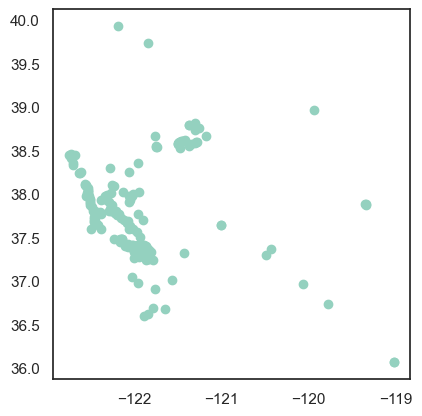

In [105]:
bus_stations = pois_df[pois_df['amenity'] == 'bus_station']
bus_stations.plot()

In [106]:
POI = bus_stations.copy()
POI = POI[(POI["lat"] >= city_bounds["min_lat"]) & (POI["lat"] <= city_bounds["max_lat"]) &
        (POI["lon"] >= city_bounds["min_lon"]) &
        (POI["lon"] <= city_bounds["max_lon"])]
POI["Coordinates"] = list(zip(POI["lat"].round(4), POI["lon"].round(4)))
POI_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10, control_scale=True, max_zoom=20)
positions = list(POI['Coordinates'].unique())

for position in positions:
    name = POI.loc[POI['Coordinates'] == position, 'name'].values[0]
   
    marker = folium.Marker(location=position, popup=f'{name}')
    marker.add_to(POI_map)

display(POI_map)

# Displaying the location of stations

In [107]:
#make a stations_df to use for displaying locations 
columns = ['start_station_id','start_station_lat','start_station_lon']
stations_df = baywheels_df[columns]
stations_df = stations_df.drop_duplicates(subset=['start_station_id'])
stations_df.head()


start_station_id  start_station_lat  start_station_lon
0               219          37.809824        -122.280192
1               202          37.800754        -122.274894
2               182          37.809013        -122.268247
3               178          37.819381        -122.261928
4               195          37.812314        -122.260779

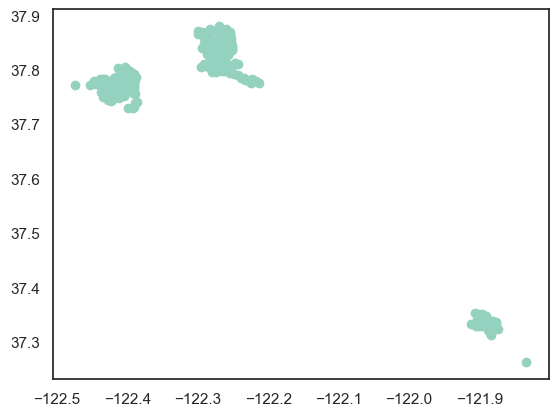

In [108]:
x = stations_df['start_station_lat']
y = stations_df['start_station_lon']
plt.scatter(y,x)

In [109]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}')
    marker.add_to(stations_map)

stations_map

In [110]:
#try to cluster the stations in three groups
from sklearn.cluster import KMeans

X = stations_df[['start_station_lat','start_station_lon']]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)

# Get the cluster labels for each station
stations_df['area_label'] = kmeans.labels_
stations_df.head()



/Users/davidbrablc/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [111]:
center_map = [37.6, -122.1] #center of our coordinates
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    cluster_label = row['area_label']
    
    # Create a marker for each station with cluster-specific colors
    if cluster_label == 0:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    elif cluster_label == 1:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    else:
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    
    marker.add_to(stations_map)

display(stations_map)

In [112]:
baywheels_df = baywheels_df.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              .

In [113]:
#add the 'area_label' to baywheels_geo and baywheels_df
baywheels_geo = baywheels_geo.merge(stations_df[['start_station_id', 'area_label']], on='start_station_id', how='left')


In [114]:
## make a seperate dataframe for each area 
san_jose_df_points = stations_df[stations_df['area_label'] == 1]

san_fran_df_points = stations_df[stations_df['area_label'] == 2]

oakland_df_points = stations_df[stations_df['area_label'] == 0]
oakland_df_points.head()



start_station_id  start_station_lat  start_station_lon  area_label
0               219          37.809824        -122.280192           0
1               202          37.800754        -122.274894           0
2               182          37.809013        -122.268247           0
3               178          37.819381        -122.261928           0
4               195          37.812314        -122.260779           0

In [115]:
san_jose_df_full = baywheels_geo[baywheels_geo['area_label'] == 1]

san_fran_df_full = baywheels_geo[baywheels_geo['area_label'] == 2]

oakland_df_full = baywheels_geo[baywheels_geo['area_label'] == 0]
oakland_df_full.head()

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0 2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1 2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2 2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3 2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4 2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0

In [116]:
#san_fran_df.plot()


In [117]:
center_map = [37.737, -122.43] #center of our coordinates
san_fran_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12, control_scale=True, max_zoom=20)

for index, row in san_fran_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='green'))
    marker.add_to(san_fran_map)

san_fran_map



In [118]:
san_jose_df_points.plot

In [119]:
center_map = [37.300964,-121.882016] #center of our coordinates
san_jose_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in san_jose_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='blue'))
    marker.add_to(san_jose_map)

san_jose_map


In [120]:
center_map = [37.830824, -122.2801920] #center of our coordinates
oakland_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=12.3, control_scale=True, max_zoom=20)

for index, row in oakland_df_points.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']
    
    # Create a marker for each station
    marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color='red'))
    marker.add_to(oakland_map)

oakland_map


In [121]:
#display list of all stations in the corresponding areas
oakland_list = oakland_df_points['start_station_id'].tolist()
san_jose_list = san_jose_df_points['start_station_id'].tolist()
san_fran_list = san_fran_df_points['start_station_id'].tolist()
print('In Oakland are the following stations:', oakland_list)
print('\nIn San Francisco are the following stations:', san_fran_list)
print('\nIn San Jose are the following stations:', san_jose_list)

In Oakland are the following stations: [219, 202, 182, 178, 195, 215, 162, 163, 167, 212, 233, 201, 186, 194, 181, 196, 7, 337, 197, 183, 180, 164, 189, 153, 150, 187, 203, 200, 239, 245, 247, 250, 251, 259, 256, 176, 211, 198, 160, 231, 234, 227, 174, 188, 230, 266, 252, 270, 340, 274, 157, 241, 169, 193, 158, 168, 269, 272, 220, 338, 159, 265, 248, 254, 253, 249, 171, 205, 246, 18, 240, 243, 315, 151, 166, 267, 242, 273, 268, 214, 191, 232, 190, 218, 155, 372, 46, 339, 222, 237, 210, 213, 179, 175, 235, 238, 244, 206, 177, 172, 149, 209, 204, 207, 173, 221, 154, 236, 148, 216, 263, 192, 255, 258, 152, 351, 262, 170, 225, 228, 156, 271, 217, 257, 229, 226, 224]

In San Francisco are the following stations: [60, 324, 37, 53, 5, 25, 66, 74, 21, 49, 133, 137, 36, 28, 16, 17, 27, 24, 30, 44, 81, 93, 285, 34, 19, 6, 323, 22, 107, 129, 119, 89, 122, 26, 90, 114, 80, 130, 141, 97, 3, 42, 41, 116, 72, 15, 14, 58, 78, 43, 98, 105, 120, 75, 79, 13, 95, 33, 67, 4, 86, 23, 342, 20, 29, 59, 125, 1

# Overall System Performance


we will further on just focus on the San Francisco area

In [122]:
baywheels_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
0       2018-01-07 08:05:33 2018-01-07 08:11:35               219          37.809824        -122.280192             232        37.806163      -122.276040       11 0 days 00:06:02             NaT                9.0              9.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1021.31       1021.31              0.0            0.0                  0.0                0.0                     9.0                   9.0        6           1              0.0                         3           0          0.546616  POINT (-122.28019 37.80982)           0
1       2018-01-12 14:06:46 2018-01-12 14:12:42               202          37.800754        -122.274894             182        37.809013      -122.268247       11 0 days 00:05:56 5 days 05:55:11               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1027.74       1027.74              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.087571  POINT (-122.27489 37.80075)           0
2       2018-01-12 15:57:16 2018-01-12 16:05:17               182          37.809013        -122.268247             178        37.819381      -122.261928       11 0 days 00:08:01 0 days 01:44:34               12.0             12.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1028.08       1028.08             11.0           11.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.278308  POINT (-122.26825 37.80901)           0
3       2018-01-14 11:02:47 2018-01-14 11:08:04               178          37.819381        -122.261928             195        37.812314      -122.260779       11 0 days 00:05:17 1 days 18:57:30               11.0             10.0               33.0             33.0                          Fair                        Fair         1020.97       1020.63              9.0            6.0                  0.0                0.0                    11.0                  10.0        6           1              1.0                         4           0          0.790929  POINT (-122.26193 37.81938)           0
4       2018-01-14 11:48:48 2018-01-14 11:57:23               195          37.812314        -122.260779             215        37.822547      -122.266318       11 0 days 00:08:35 0 days 00:40:44               10.0             10.0               26.0             26.0                        Cloudy                      Cloudy         1020.29       1020.29              9.0            9.0                  0.0                0.0                    10.0                  10.0        6           1              0.0                         3           0          1.236129  POINT (-122.26078 37.81231)           0
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...             ...           ...              .

In [123]:
san_fran_df = baywheels_df[baywheels_df['area_label'] == 2]

In [124]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362601 entries, 1435 to 1851949
Data columns (total 33 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   start_time                     1362601 non-null  datetime64[ns] 
 1   end_time                       1362601 non-null  datetime64[ns] 
 2   start_station_id               1362601 non-null  int64          
 3   start_station_lat              1362601 non-null  float64        
 4   start_station_lon              1362601 non-null  float64        
 5   end_station_id                 1362601 non-null  int64          
 6   end_station_lat                1362601 non-null  float64        
 7   end_station_lon                1362601 non-null  float64        
 8   bike_id                        1362601 non-null  int64          
 9   trip_duration                  1362601 non-null  timedelta64[ns]
 10  idle_time                      1359902 

## Total Number of Trips

In [125]:
trips=len(san_fran_df.index)
trips

1362601

## Average Trips per Day and Month

In [126]:
trips_per_day=trips/365
trips_per_month=trips/12
print("Trips per day:", int(trips_per_day),"\nTrips per month:", int(trips_per_month))

Trips per day: 3733 
Trips per month: 113550


## Distance Covered by the Bikes and Emissions Saved

In [127]:
#assumption that trips are made directly from station to station so the estimatimation is undervalued
distance_total=san_fran_df["station_distance"].sum()
round(distance_total)

2264735

In [128]:
emissions=120.1
emissions_saved=distance_total*emissions
round(emissions_saved)

271994650

In [129]:
avg_kms_per_car= 13500
cars_saved=emissions_saved/avg_kms_per_car
round(cars_saved)

20148

## Rush hour average number of trips per day

In [130]:
import datetime

# Set the specific hour (in 24-hour format)
morning_hour_start = 7
morning_hour_end = 9
afternoon_hour_start = 16
afternoon_hour_end = 19

# Extract the hour from the 'start_time' column
san_fran_df['hour'] = san_fran_df['start_time'].dt.hour

# Filter rows after the specific hours and on weekdays
rush_san_fran_df = san_fran_df.loc[
    (((san_fran_df['hour'] >= morning_hour_start) & (san_fran_df['hour'] < morning_hour_end)) |
     ((san_fran_df['hour'] >= afternoon_hour_start) & (san_fran_df['hour'] < afternoon_hour_end))) &
    (san_fran_df['Is_Weekend'] == 0)
].copy()

# Print the filtered DataFrame
print(rush_san_fran_df)

/var/folders/dh/b9f34l0s49b122_qw3nwn1440000gn/T/ipykernel_12056/3130045857.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_fran_df['hour'] = san_fran_df['start_time'].dt.hour


                 start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0

In [131]:
rush_trips=len(rush_san_fran_df.index)
rush_trips

578222

In [132]:
#Assumption rush hour 7-9, 16-19
rush_trips_per_day=rush_trips/365
print("Rush trips per day:", int(rush_trips_per_day))

Rush trips per day: 1584


## finding most unused stations

In [133]:
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label  hour
1435    2018-01-02 07:32:44 2018-01-02 07:44:36                60          37.774520        -122.409449             324        37.788300      -122.408531       17 0 days 00:11:52             NaT               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.65       1021.65              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.531567  POINT (-122.40945 37.77452)           2     7
1436    2018-01-02 09:17:14 2018-01-02 09:23:41               324          37.788300        -122.408531              37        37.785000      -122.395936       17 0 days 00:06:27 0 days 01:32:38               12.0             12.0               26.0             26.0                        Cloudy                      Cloudy         1021.31       1021.31              6.0            6.0                  0.0                0.0                    12.0                  12.0        1           0              0.0                         3           0          1.168362  POINT (-122.40853 37.78830)           2     9
1437    2018-01-03 05:13:20 2018-01-03 05:15:55                37          37.785000        -122.395936              21        37.789625      -122.400811       17 0 days 00:02:35 0 days 19:49:39               14.0             14.0               26.0             26.0                        Cloudy                      Cloudy         1018.60       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        2           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2     5
1438    2018-01-03 12:49:30 2018-01-03 13:11:05                53          37.775946        -122.437777               5        37.783899      -122.408445       17 0 days 00:21:35 0 days 07:33:35               12.0             12.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1016.57       1016.57              6.0            6.0                  0.0                0.0                    12.0                  12.0        2           0              0.0                         3           0          2.730661  POINT (-122.43778 37.77595)           2    12
1439    2018-01-03 16:21:24 2018-01-03 16:26:19                 5          37.783899        -122.408445              25        37.787522      -122.397405       17 0 days 00:04:55 0 days 03:10:19               11.0             12.0               28.0             26.0                 Mostly Cloudy                      Cloudy         1016.23       1016.57              0.0            7.0                  0.0                0.0                    11.0                  12.0        2           0             -1.0                         2           0          1.052319  POINT (-122.40844 37.78390)           2    16
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...                ...              ...                ...              ...                           ...                         ...         

In [134]:
# calculate the number of rentals starting & ending from each station, then merge them into one dataframe

start_station_counts = baywheels_df['start_station_id'].value_counts()
end_station_counts = baywheels_df['end_station_id'].value_counts()

"""
# checking all the stations appear:

start_sta = sorted(list(set(baywheels_df['start_station_id'].tolist())))
end_sta = sorted(list(set(baywheels_df['end_station_id'].tolist())))

if start_sta == end_sta:
    print("all stations are here")
else:
    print("problem!")

"""

station_utilization = pd.DataFrame({
    'station_id': start_station_counts.index,
    'pick-ups': start_station_counts.values,
    'returns': end_station_counts.values,
    'total': start_station_counts.values + end_station_counts.values})

# Display the station utilization dataframe


display(station_utilization)




station_id  pick-ups  returns  total
0            15     38461    50000  88461
1            67     37617    44113  81730
2            30     35092    42970  78062
3            58     34918    39222  74140
4            81     33716    35955  69671
5             6     33390    34365  67755
6            21     32131    33086  65217
7             3     31656    32786  64442
8            16     28367    28592  56959
9            22     26535    26002  52537
10            5     25007    23926  48933
11           17     21883    21094  42977
12           66     21649    20427  42076
13           90     18216    20071  38287
14           93     18150    19365  37515
15           50     17953    19213  37166
16           27     17778    18841  36619
17           44     17664    18440  36104
18          182     16435    18168  34603
19           23     15907    16746  32653
20           19     15611    15325  30936
21          243     14118    14411  28529
22          134     13651    13775  27426
23           37     13453    13615  27068
24          176     12791    13151  25942
25          126     12788    12884  25672
26           20     12678    12521  25199
27           24     12644    12471  25115
28           70     12448    12408  24856
29          324     12410    12220  24630
30           60     12148    12164  24312
31           28     12118    12095  24213
32           41     12089    12048  24137
33           43     12024    11811  23835
34           61     11727    11730  23457
35           98     11621    11500  23121
36           14     11549    11491  23040
37          284     11490    11438  22928
38          114     11408    11387  22795
39           49     11373    11296  22669
40            8     11322    11261  22583
41          239     11260    11118  22378
42           89     11079    10969  22048
43           47     11074    10900  21974
44          321     11074    10805  21879
45           36     10890    10786  21676
46           74     10795    10539  21334
47           59     10617    10415  21032
48          163     10359    10381  20740
49          323     10106    10097  20203
50            9      9989    10032  20021
51           11      9731     9967  19698
52           25      9694     9912  19606
53           88      9503     9813  19316
54          121      9472     9747  19219
55          343      9306     9591  18897
56          196      9291     9548  18839
57          109      9260     9413  18673
58           62      9209     9399  18608
59          160      9176     9266  18442
60           80      9075     9208  18283
61           75      9001     9109  18110
62           86      8883     9018  17901
63          197      8841     8874  17715
64           64      8771     8666  17437
65          245      8711     8642  17353
66           13      8677     8566  17243
67            7      8658     8462  17120
68          195      8555     8419  16974
69          223      8541     8378  16919
70           77      8375     8289  16664
71           76      8306     8201  16507
72           79      8262     8041  16303
73          200      8128     8025  16153
74           78      8104     7895  15999
75          181      8094     7805  15899
76          120      7859     7765  15624
77           10      7816     7739  15555
78          130      7814     7725  15539
79          310      7676     7702  15378
80          127      7657     7698  15355
81          241      7612     7636  15248
82          129      7582     7546  15128
83          112      7571     7440  15011
84          350      7551     7328  14879
85          104      7438     7319  14757
86          133      7387     7313  14700
87           42      7367     7248  14615
88          171      7299     6987  14286
89          296      7084     6953  14037
90           95      7063     6690  13753
91          141      6981     6612  13593
92          139      6930     6476  13406
93          285      6864     6426  13290
94           26

this is a regular grah, but since we have many stations and varius number of rentals - i think the praphs are not really helpful here.

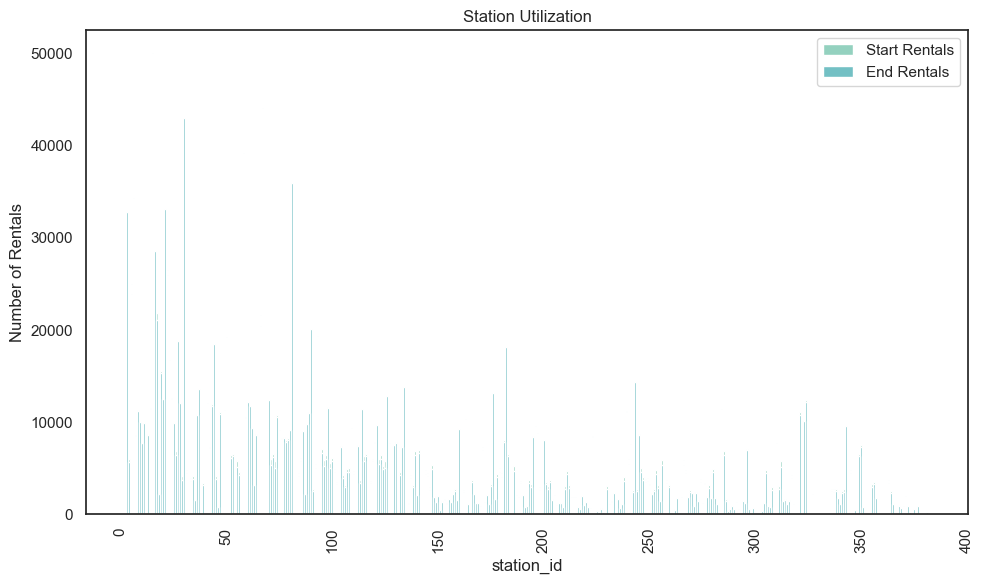

In [135]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('station_id')
plt.ylabel('Number of Rentals')
plt.title('Station Utilization')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

log graph:

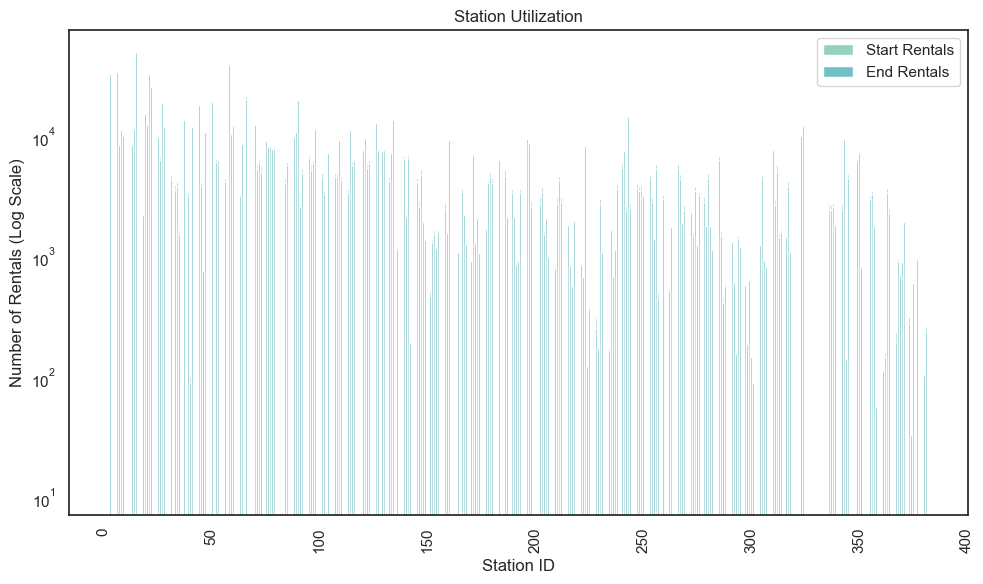

In [136]:

plt.figure(figsize=(10, 6))
plt.bar(station_utilization['station_id'], station_utilization['pick-ups'], label='Start Rentals')
plt.bar(station_utilization['station_id'], station_utilization['returns'], label='End Rentals')
plt.xlabel('Station ID')
plt.ylabel('Number of Rentals (Log Scale)')
plt.title('Station Utilization')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

seperated graphs for returns\pick ups stations:

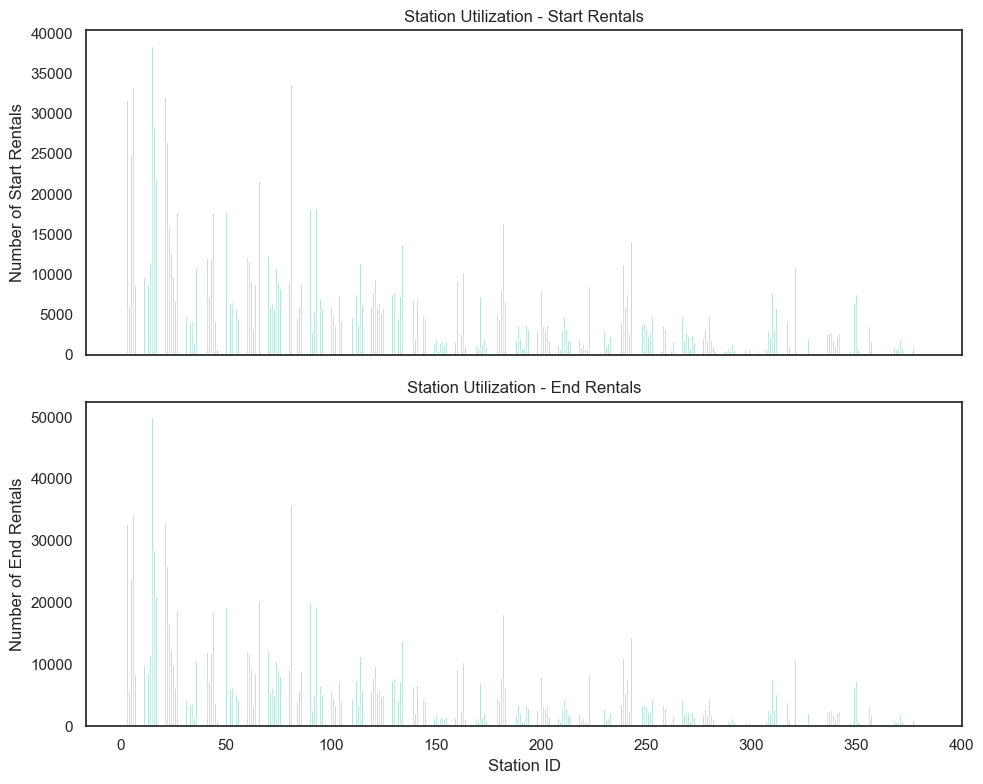

In [137]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for start rentals
ax1.bar(station_utilization['station_id'], station_utilization['pick-ups'])
ax1.set_ylabel('Number of Start Rentals')
ax1.set_title('Station Utilization - Start Rentals')

# Plot for end rentals
ax2.bar(station_utilization['station_id'], station_utilization['returns'])
ax2.set_xlabel('Station ID')
ax2.set_ylabel('Number of End Rentals')
ax2.set_title('Station Utilization - End Rentals')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

count                       mean                        std              min                     25%                     50%                     75%              max
start_station_id                                                                                                                                                                       
3                 31656  0 days 00:16:34.094642405  0 days 00:47:03.521602366  0 days 00:01:01         0 days 00:06:30         0 days 00:09:06         0 days 00:14:55  0 days 23:53:03
4                  6058  0 days 00:23:04.994882799  0 days 01:04:24.243543684  0 days 00:01:02         0 days 00:07:58  0 days 00:12:03.500000  0 days 00:19:57.750000  0 days 21:52:56
5                 25007  0 days 00:16:11.265285719  0 days 00:49:03.860885888  0 days 00:01:02         0 days 00:06:07         0 days 00:09:00         0 days 00:14:34  0 days 23:49:48
6                 33390  0 days 00:22:32.928930817  0 days 00:52:11.778571200  0 days 00:01:01         0 days 00:06:57         0 days 00:12:17         0 days 00:21:09  0 days 23:45:47
7                  8658  0 days 00:14:08.183067683  0 days 00:48:43.609654621  0 days 00:01:02         0 days 00:05:38         0 days 00:08:22         0 days 00:13:09  0 days 23:41:48
8                 11322  0 days 00:24:34.697933227  0 days 01:00:01.582457125  0 days 00:01:01         0 days 00:05:45         0 days 00:13:21         0 days 00:22:06  0 days 22:32:56
9                  9989  0 days 00:14:17.021523676  0 days 00:31:15.205497492  0 days 00:01:02         0 days 00:05:06         0 days 00:09:49         0 days 00:16:00  0 days 21:59:47
10                 7816  0 days 00:20:48.319344933  0 days 00:44:52.490998396  0 days 00:01:01  0 days 00:07:59.750000         0 days 00:14:02  0 days 00:22:30.250000  0 days 23:43:10
11                 9731  0 days 00:14:38.687493577  0 days 00:30:49.304259626  0 days 00:01:01         0 days 00:05:15         0 days 00:10:33  0 days 00:15:58.500000  0 days 22:03:17
13                 8677  0 days 00:13:53.478506396  0 days 00:37:41.317901591  0 days 00:01:02         0 days 00:05:19         0 days 00:09:33         0 days 00:15:08  0 days 20:56:02
14                11549  0 days 00:16:28.760931682  0 days 00:36:07.350437322  0 days 00:01:01         0 days 00:06:56         0 days 00:12:09         0 days 00:17:15  0 days 21:57:03
15                38461  0 days 00:21:30.263903694  0 days 00:53:53.228703578  0 days 00:01:01         0 days 00:07:12         0 days 00:11:35         0 days 00:18:31  0 days 23:43:43
16                28367  0 days 00:14:43.818486269  0 days 00:33:32.829810182  0 days 00:01:01         0 days 00:07:09         0 days 00:10:44         0 days 00:15:01  0 days 23:31:10
17                21883  0 days 00:13:52.986519215  0 days 00:36:27.356113956  0 days 00:01:03         0 days 00:05:20         0 days 00:09:38         0 days 00:14:31  0 days 23:00:50
18                 2253  0 days 00:13:18.495783399  0 days 00:36:43.608395668  0 days 00:01:01         0 days 00:05:29         0 days 00:09:38         0 days 00:14:57  0 days 19:54:45
19                15611  0 days 00:14:33.440714880  0 days 00:36:47.829021651  0 days 00:01:02         0 days 00:06:42         0 days 00:09:52         0 days 00:15:03  0 days 22:56:14
20                12678  0 days 00:16:08.924672661  0 days 00:44:15.431674187  0 days 00:01:01  0 days 00:05:44.250000         0 days 00:10:29         0 days 00:17:06  0 days 23:12:59
21                32131  0 days 00:13:18.978743269  0 days 00:36:11.192268087  0 days 00:01:01         0 days 00:06:01         0 days 00:08:57         0 days 00:13:01  0 days 22:02:08
22                26535  0 days 00:12:25.613152440  0 days 00:23:27.796241223  0 days 00:01:01         0 days 00:07:15         0 days 00:10:07  0 days 00:14:01.500000  0 days 23:35:41
23                15907  0 days 00:13:28.972464952  0 days 00:29:20.647829122  0 days 00:01:03         0 days 00:07:25         0 days 00:10:01  0 days 00:

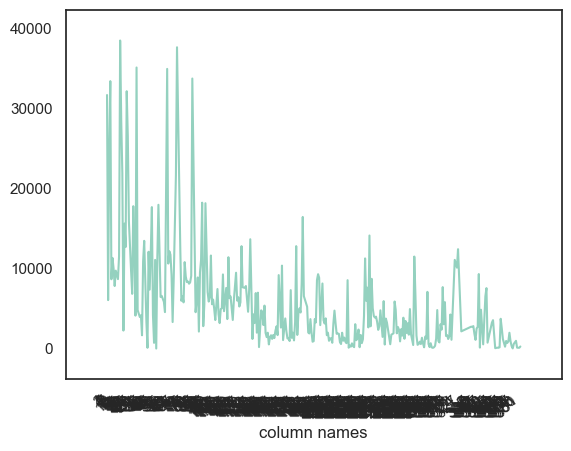

In [138]:
stations_trip_duration_start = baywheels_df.groupby('start_station_id')['trip_duration'].describe()

display(stations_trip_duration_start)

plt.plot(stations_trip_duration_start.index, stations_trip_duration_start['count'])
plt.xticks(stations_trip_duration_start.index, stations_trip_duration_start.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

showing number of total rentals of a station on the map. 

can change the numbers we are reffering to. i chose:

red; 365 - because it means less than 1 rental a day in this year

orange; the median 

green; others

(can also seperate for pick ups and returns but I dont know if needed)

### display stations color divided depending on the number of total interactions with the station

In [139]:
# calculation of median & mean:
import numpy as np

print("median:", np.median(station_utilization['total']), "\nmean:", station_utilization['total'].mean())

# Create a map object
stations_map = folium.Map(location=center_map,tiles='OpenStreetMap',zoom_start=10, control_scale=True, max_zoom=20)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding usage data for the current station_id
    row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not row.empty:
        usage_value = row.iloc[0]['total']

        # Determine the marker color based on the usage value
        if usage_value < 365:
            color = 'red'
        elif usage_value <= np.median(station_utilization['total']): #can also use mean instade: (station_utilization['total'].mean())
            color = 'orange'
        else:
            color = 'green'

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id} \nInteractions: {usage_value}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map



median: 6836.0 
mean: 11190.030211480362


### display stations color divided depending on the duration of the trips

In [140]:
from datetime import timedelta

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_duration_start.index:
        trip_stats = stations_trip_duration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Convert timedelta values to minutes
        mean_duration_minutes = mean_duration.total_seconds() / 60
        max_duration_minutes = max_duration.total_seconds() / 60
        min_duration_minutes = min_duration.total_seconds() / 60

        # Determine the marker color based on the trip duration statistics
        if mean_duration < timedelta(minutes=10):
            color = 'green'
        elif mean_duration <= timedelta(minutes=20):
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration_minutes:.2f} minutes\nMax Duration: {max_duration_minutes:.2f} minutes\nMin Duration: {min_duration_minutes:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
stations_map


## trying to calculate the station idle time

In [141]:
# im trying to check how many stations there are, but im not sure what im doing 

stations_df.sort_values(by='start_station_id', ascending=False).head(1)

number_of_stations = stations_df['start_station_id'].max() # this is working better after 
print(number_of_stations)


381


In [142]:
#creating an empty array that will have the total idle time for each station: stations_idle_times[station_number] = station_total_idle_time

stations_idle_times = [None] * number_of_stations

baywheels_df.sort_values(by='start_time', inplace=True)

baywheels_df['station_idle_time'] = 0

stations_returns = {}
stations_idle_times_dict = {}

for index, row in baywheels_df.iterrows():
    end_station_number = row['end_station_id']
    start_station_number = row['start_station_id']

    return_time = row['end_time']    
    take_time = row['start_time']

    #print(f"Processing row {index}, start_station_number: {start_station_number}, end_station_number: {start_station_number} stations_returns: {stations_returns}")

    if end_station_number not in stations_returns:
        stations_returns[end_station_number] = []
    
    stations_returns[end_station_number].append(return_time)


    if start_station_number in stations_returns:
        if len(stations_returns[start_station_number]) > 0:
            time = stations_returns[start_station_number][0]
            idle_time = take_time - time
            baywheels_df.at[index, 'station_idle_time'] = idle_time
            stations_returns[start_station_number].pop(0)

            #stations_idle_times[start_station_number] += idle_time
            
    else: # this will set the idle time to be the time from the beggining of the year (for the first pickup of everystation)
        first_moment_2018 = datetime.datetime(2018, 1, 1, 0, 0, 0)
        baywheels_df.at[index, 'station_idle_time'] = take_time - first_moment_2018

"""
    if start_station_number not in stations_idle_times_dict:
            stations_idle_times_dict[start_station_number] = []

        stations_idle_times_dict[start_station_number].append(idle_time)


print(stations_idle_times_dict)
    
"""     

            




'\n    if start_station_number not in stations_idle_times_dict:\n            stations_idle_times_dict[start_station_number] = []\n\n        stations_idle_times_dict[start_station_number].append(idle_time)\n\n\nprint(stations_idle_times_dict)\n    \n'

In [143]:
#move the station_idle_time column behind the idle_time column
# Get the column names
columns = baywheels_df.columns.tolist()

# Find the index of 'trip_duration' and 'idle_time' columns
idle_time_index = columns.index('idle_time')
station_idle_time_index = columns.index('station_idle_time')

# Move 'station_idle_time' column to the desired position
columns.insert(idle_time_index + 1, columns.pop(station_idle_time_index))

# Reorder the DataFrame columns
baywheels_df = baywheels_df[columns]


In [144]:
baywheels_df


start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time station_idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
1200085 2018-01-01 00:01:53 2018-01-01 03:50:23                86          37.769305        -122.426826             119        37.761047      -122.432642     2924 0 days 03:48:30             NaT   0 days 00:01:53               14.0             12.0               28.0             27.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1019.96              6.0            0.0                  0.0                0.0                    14.0                  12.0        0           0              2.0                         4           0          1.050128  POINT (-122.42683 37.76931)           2
987330  2018-01-01 00:07:41 2018-01-01 00:10:06               316          37.330165        -121.885831             311        37.333798      -121.886943     2473 0 days 00:02:25             NaT   0 days 00:07:41               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          0.415073  POINT (-121.88583 37.33017)           1
965803  2018-01-01 00:07:52 2018-01-01 00:19:47                74          37.776435        -122.426244              70        37.773311      -122.444293     2423 0 days 00:11:55             NaT   0 days 00:07:52               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          1.627451  POINT (-122.42624 37.77643)           2
1465613 2018-01-01 00:09:31 2018-01-01 00:28:43                97          37.768265        -122.420110             125        37.759200      -122.409851     3455 0 days 00:19:12             NaT   0 days 00:09:31               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          1.352513  POINT (-122.42011 37.76826)           2
862756  2018-01-01 00:14:37 2018-01-01 00:37:16                11          37.797280        -122.398436             323        37.798014      -122.405950     2173 0 days 00:22:39             NaT   0 days 00:14:37               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          0.666811  POINT (-122.39844 37.79728)           2
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...               ...                ...              ...             

In [145]:
baywheels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 1200085 to 1819280
Data columns (total 34 columns):
 #   Column                         Dtype          
---  ------                         -----          
 0   start_time                     datetime64[ns] 
 1   end_time                       datetime64[ns] 
 2   start_station_id               int64          
 3   start_station_lat              float64        
 4   start_station_lon              float64        
 5   end_station_id                 int64          
 6   end_station_lat                float64        
 7   end_station_lon                float64        
 8   bike_id                        int64          
 9   trip_duration                  timedelta64[ns]
 10  idle_time                      timedelta64[ns]
 11  station_idle_time              object         
 12  start_temperature              float64        
 13  end_temperature                float64        
 14  start_cloud_cover              float64      

In [146]:
baywheels_df['station_idle_time'] = pd.to_timedelta(baywheels_df['station_idle_time'])

In [147]:
san_fran_df = baywheels_df[baywheels_df['area_label'] == 2]
san_fran_df

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time station_idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
1200085 2018-01-01 00:01:53 2018-01-01 03:50:23                86          37.769305        -122.426826             119        37.761047      -122.432642     2924 0 days 03:48:30             NaT   0 days 00:01:53               14.0             12.0               28.0             27.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1019.96              6.0            0.0                  0.0                0.0                    14.0                  12.0        0           0              2.0                         4           0          1.050128  POINT (-122.42683 37.76931)           2
965803  2018-01-01 00:07:52 2018-01-01 00:19:47                74          37.776435        -122.426244              70        37.773311      -122.444293     2423 0 days 00:11:55             NaT   0 days 00:07:52               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          1.627451  POINT (-122.42624 37.77643)           2
1465613 2018-01-01 00:09:31 2018-01-01 00:28:43                97          37.768265        -122.420110             125        37.759200      -122.409851     3455 0 days 00:19:12             NaT   0 days 00:09:31               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          1.352513  POINT (-122.42011 37.76826)           2
862756  2018-01-01 00:14:37 2018-01-01 00:37:16                11          37.797280        -122.398436             323        37.798014      -122.405950     2173 0 days 00:22:39             NaT   0 days 00:14:37               14.0             14.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1018.60              6.0            6.0                  0.0                0.0                    14.0                  14.0        0           0              0.0                         3           0          0.666811  POINT (-122.39844 37.79728)           2
920134  2018-01-01 00:15:26 2018-01-01 05:08:01                55          37.777053        -122.429558             285        37.783521      -122.431158     2315 0 days 04:52:35             NaT   0 days 00:15:26               14.0             12.0               28.0             27.0                 Mostly Cloudy               Mostly Cloudy          1018.6       1020.63              6.0            6.0                  0.0                0.0                    14.0                  12.0        0           0              2.0                         4           0          0.731608  POINT (-122.42956 37.77705)           2
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...               ...                ...              ...             

In [148]:
san_fran_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1362601 entries, 1200085 to 1819280
Data columns (total 34 columns):
 #   Column                         Non-Null Count    Dtype          
---  ------                         --------------    -----          
 0   start_time                     1362601 non-null  datetime64[ns] 
 1   end_time                       1362601 non-null  datetime64[ns] 
 2   start_station_id               1362601 non-null  int64          
 3   start_station_lat              1362601 non-null  float64        
 4   start_station_lon              1362601 non-null  float64        
 5   end_station_id                 1362601 non-null  int64          
 6   end_station_lat                1362601 non-null  float64        
 7   end_station_lon                1362601 non-null  float64        
 8   bike_id                        1362601 non-null  int64          
 9   trip_duration                  1362601 non-null  timedelta64[ns]
 10  idle_time                      13599

In [155]:
lowest_station_idle_time = san_fran_df.nsmallest(30000, 'station_idle_time')
lowest_station_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time station_idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
714751  2018-02-08 18:32:19 2018-02-08 18:40:10                 9          37.798572        -122.400869              22        37.789756      -122.394643     1832 0 days 00:07:51 0 days 01:24:23 -1 days +00:26:12               16.0             16.0               34.0             34.0                          Fair                        Fair         1023.00       1023.00              7.0            7.0                  0.0                0.0                    16.0                  16.0        3           0              0.0                         3           0          1.121702  POINT (-122.40087 37.79857)           2
927919  2018-03-30 17:27:18 2018-03-30 17:31:24                37          37.785000        -122.395936              21        37.789625      -122.400811     2331 0 days 00:04:06 0 days 04:15:17 -1 days +00:52:37               18.0             18.0               28.0             28.0                 Mostly Cloudy               Mostly Cloudy         1018.94       1018.94              7.0            7.0                  0.0                0.0                    18.0                  18.0        4           0              0.0                         3           0          0.669345  POINT (-122.39594 37.78500)           2
660944  2018-01-10 10:24:36 2018-01-10 10:36:12                72          37.772406        -122.435650             129        37.758862      -122.412544     1692 0 days 00:11:36 0 days 01:05:22 -1 days +00:59:50               11.0             11.0               33.0             29.0                          Fair       Partly Cloudy / Windy         1015.89       1016.57             28.0           37.0                  0.0                0.0                    11.0                  11.0        2           0              0.0                         3           0          2.530741  POINT (-122.43565 37.77241)           2
1159978 2018-02-01 09:17:40 2018-02-01 09:27:40               323          37.798014        -122.405950              22        37.789756      -122.394643     2848 0 days 00:10:00 0 days 01:09:20 -1 days +01:56:09               13.0             11.0               26.0             26.0                        Cloudy                      Cloudy         1017.59       1017.59              7.0            6.0                  0.0                0.0                    13.0                  11.0        3           0              2.0                         4           0          1.353485  POINT (-122.40595 37.79801)           2
863192  2018-02-09 11:24:40 2018-02-09 12:16:20               324          37.788300        -122.408531              15        37.795392      -122.394203     2174 0 days 00:51:40 0 days 18:09:00 -1 days +02:04:13               12.0             12.0               33.0             33.0                          Fair                        Fair         1018.26       1017.92              0.0            0.0                  0.0                0.0                    12.0                  12.0        4           0              0.0                         3           0          1.487358  POINT (-122.40853 37.78830)           2
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...               ...                ...              ...             

In [150]:
largest_station_idle_time = san_fran_df.nlargest(12000, 'station_idle_time')
largest_station_idle_time

start_time            end_time  start_station_id  start_station_lat  start_station_lon  end_station_id  end_station_lat  end_station_lon  bike_id   trip_duration       idle_time station_idle_time  start_temperature  end_temperature  start_cloud_cover  end_cloud_cover start_cloud_cover_description end_cloud_cover_description  start_pressure  end_pressure  start_windspeed  end_windspeed  start_precipitation  end_precipitation  start_felt_temperature  end_felt_temperature  Weekday  Is_Weekend  temperature_dif  temperature_dif_category  rain_start  station_distance                     geometry  area_label
650753  2018-12-13 08:44:24 2018-12-13 09:05:51               380          37.779047        -122.447291              66        37.778742      -122.392741     1672 0 days 00:21:27 0 days 17:20:30 346 days 08:44:24                8.0              8.0               27.0             27.0                 Mostly Cloudy               Mostly Cloudy         1024.70       1024.70              0.0            0.0                  0.0                0.0                     8.0                   8.0        3           0              0.0                         3           0          4.805773  POINT (-122.44729 37.77905)           2
1562623 2018-11-07 10:22:14 2018-11-07 10:44:40               142          37.745739        -122.422140             102        37.766883      -122.399579     3658 0 days 00:22:26 1 days 00:22:37 310 days 10:22:14               10.0             10.0               29.0             33.0                 Partly Cloudy                        Fair         1015.56       1015.56             13.0           11.0                  0.0                0.0                    10.0                  10.0        2           0              0.0                         3           0          3.075731  POINT (-122.42214 37.74574)           2
1442314 2018-11-07 09:50:17 2018-11-07 10:00:16               142          37.745739        -122.422140             124        37.760447      -122.410807     3405 0 days 00:09:59 1 days 00:26:47 310 days 09:50:17               10.0             10.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1015.56       1015.56             13.0           13.0                  0.0                0.0                    10.0                  10.0        2           0              0.0                         3           0          1.913766  POINT (-122.42214 37.74574)           2
1542032 2018-11-07 09:39:12 2018-11-07 09:52:56               142          37.745739        -122.422140              58        37.776619      -122.417385     3623 0 days 00:13:44 1 days 00:28:42 310 days 09:39:12               10.0             10.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1015.56       1015.56             13.0           13.0                  0.0                0.0                    10.0                  10.0        2           0              0.0                         3           0          3.452972  POINT (-122.42214 37.74574)           2
1051539 2018-11-07 09:29:37 2018-11-07 09:51:14               142          37.745739        -122.422140             349        37.781010      -122.405666     2623 0 days 00:21:37 1 days 00:51:49 310 days 09:29:37               10.0             10.0               29.0             29.0                 Partly Cloudy               Partly Cloudy         1015.56       1015.56             13.0           13.0                  0.0                0.0                    10.0                  10.0        2           0              0.0                         3           0          4.175251  POINT (-122.42214 37.74574)           2
...                     ...                 ...               ...                ...                ...             ...              ...              ...      ...             ...             ...               ...                ...              ...             

copy the following code to try, idk why it collaps :(

### the rest does not work

In [ ]:
#creating an empty array that will have the total idle time for each station: stations_idle_times[station_number] = station_total_idle_time

stations_idle_times = [0] * number_of_stations

baywheels_df['station_idle_time'] = 0

stations_returns = {}
stations_idle_times_dict = {}

for index, row in baywheels_df.iterrows():
    end_station_number = row['end_station_id']
    start_station_number = row['start_station_id']

    return_time = row['end_time']    
    take_time = row['start_time']

    if start_station_number in stations_returns:
        #if len(stations_returns[start_station_number]) > 0:  #tbh i dont understand why this is needed
        time = stations_returns[start_station_number][0]
        idle_time = take_time - time
        row['station_idle_time'] = idle_time
        #להכניס אתה הוצאה במקום למילון - לטבלה
        stations_returns[start_station_number].pop(0)
    
    else:
        first_moment_2018 = datetime.datetime(2018, 1, 1, 0, 0, 0)
        row['station_idle_time'] = first_moment_2018

    if end_station_number not in stations_returns:
        stations_returns[end_station_number] = []
    
    stations_returns[end_station_number].append(return_time)


"""
        if start_station_number not in stations_idle_times_dict:
            stations_idle_times_dict[start_station_number] = []

        stations_idle_times_dict[start_station_number].append(idle_time)

"""     

            

#print(stations_idle_times_dict)

baywheels_df.head()




In [ ]:
baywheels_df.head(50)


In [ ]:
import folium
import numpy as np

# Define the quartile thresholds for the average travel time in minutes
thresholds = np.percentile(stations_trip_doration_start['mean'], [25, 50, 75])

# Define the color range for the average travel time
color_range = ['#00FF00', '#FFFF00', '#FF0000']  # Green, Yellow, Red

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the color based on the average travel time
        color_index = sum(mean_duration > thresholds)
        color = color_range[color_index]

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)


In [ ]:
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Finding the median trip duration for each starting station
stations_trip_duration_start = baywheels_df.groupby('start_station_id')['trip_duration'].median()

# Create a colormap with a gradient from green to red
cmap = LinearSegmentedColormap.from_list('gradient', ['#00FF00', '#FF0000'])

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding trip duration for the current station_id
    trip_duration = stations_trip_duration_start.get(station_id)

    if trip_duration:
        # Normalize the trip duration between 0 and 1
        normalized_value = (trip_duration - stations_trip_duration_start.min()) / (stations_trip_duration_start.max() - stations_trip_duration_start.min())

        # Map the normalized value to a color from the colormap
        color = cmap(normalized_value)

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)


In [ ]:
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#finding from which stations are the longest rentals
stations_trip_doration_start = baywheels_df.groupby('start_station_id')['trip_duration'].describe()

# Create a colormap with a gradient from green to red
cmap = LinearSegmentedColormap.from_list('gradient', ['#00FF00', '#FF0000'])

# Create the folium map
center_map = [37.6, -122.1]
stations_map = folium.Map(location=center_map, tiles='OpenStreetMap', zoom_start=10)

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['start_station_id']
    latitude = row['start_station_lat']
    longitude = row['start_station_lon']

    # Find the corresponding usage data for the current station_id
    usage_row = station_utilization.loc[station_utilization['station_id'] == station_id]
    if not usage_row.empty:
        usage_value = usage_row.iloc[0]['total']

        # Normalize the usage value between 0 and 1
        normalized_value = (usage_value - station_utilization['total'].min()) / (station_utilization['total'].max() - station_utilization['total'].min())

        # Map the normalized value to a color from the colormap
        color = cmap(normalized_value)

        # Create a marker with the determined color
        marker = folium.Marker([latitude, longitude], popup=f'Station ID: {station_id}', icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)

"""

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the marker color based on the trip duration statistics
        if mean_duration < 10:
            color = 'green'
        elif mean_duration <= 20:
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)
"""

In [ ]:

#finding from which are the stations that the bikes where returnd after the longest time.
stations_trip_doration_end = baywheels_df.groupby('end_station_id')['trip_duration'].describe()

# Iterate over each row in stations_df
for index, row in stations_df.iterrows():
    station_id = row['end_station_id']
    latitude = row['end_station_lat']
    longitude = row['end_station_lon']

    # Find the corresponding trip duration statistics for the current station_id
    if station_id in stations_trip_doration_start.index:
        trip_stats = stations_trip_doration_start.loc[station_id]
        mean_duration = trip_stats['mean']
        max_duration = trip_stats['max']
        min_duration = trip_stats['min']

        # Determine the marker color based on the trip duration statistics
        if mean_duration < 10:
            color = 'green'
        elif mean_duration <= 20:
            color = 'orange'
        else:
            color = 'red'

        # Create a marker with the determined color and tooltip showing trip duration statistics
        tooltip = f'Station ID: {station_id}\nMean Duration: {mean_duration:.2f} minutes\nMax Duration: {max_duration:.2f} minutes\nMin Duration: {min_duration:.2f} minutes'
        marker = folium.Marker([latitude, longitude], popup=tooltip, icon=folium.Icon(color=color))
        marker.add_to(stations_map)

# Display the updated map
display(stations_map)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Analysis by Starting Station
ana = baywheels_df.groupby('start_station_id')['trip_duration'].describe()
display(ana)
ana.plot(ax=mean,kind='bar', figsize=(10, 6))
#plt.bar(ana['start_station_id'], ana['mean'])
plt.xlabel('Starting Station ID')
plt.ylabel('Trip Duration AVG')
plt.title('Trip Duration Analysis by Starting Station')
plt.show()

#start_station_analysis = baywheels_df.groupby('')[''].describe()
#display(start_station_analysis)

# Plotting analysis by Starting Station
start_station_analysis.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Starting Station ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration Analysis by Starting Station')
plt.show()

# Analysis by Ending Station
end_station_analysis = baywheels_df.groupby('end_station_id')['trip_duration'].describe()

# Plotting analysis by Ending Station
end_station_analysis.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ending Station ID')
plt.ylabel('Trip Duration')
plt.title('Trip Duration Analysis by Ending Station')
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming you have latitude, longitude, and usage data for the stations in lists
latitudes = baywheels_df['start_station_lat']
longitudes = baywheels_df['start_station_lon']
usage = [usage1, usage2, usage3, ...]

# Create a map centered at the average latitude and longitude
center_lat = sum(latitudes) / len(latitudes)
center_lon = sum(longitudes) / len(longitudes)
station_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Create a list of points with latitude, longitude, and usage
points = [[lat, lon, use] for lat, lon, use in zip(latitudes, longitudes, usage)]

# Add heatmap to the map
HeatMap(points).add_to(station_map)

# Save the map to an HTML file
station_map.save('station_heatmap.html')


# leave the next two cells always at the bottom of the notebook!

In [157]:
#san_fran_df.to_csv('data_for_prediction.csv.gz', index=False, compression='gzip')


